In [1]:
# pylint: disable=invalid-name

In [2]:
import sys
import os
import logging
import gymnasium as gym
import cyberbattle.agents.baseline.learner as learner
import cyberbattle.agents.baseline.plotting as p
import cyberbattle.agents.baseline.agent_wrapper as w
import cyberbattle.agents.baseline.agent_randomcredlookup as rca
import cyberbattle.agents.baseline.agent_tabularqlearning as tqa
import cyberbattle.agents.baseline.agent_dql as dqla
import cyberbattle.agents.baseline.agent_drqn as drqn
from cyberbattle.agents.baseline.agent_wrapper import Verbosity
from cyberbattle._env.cyberbattle_env import CyberBattleEnv

logging.basicConfig(stream=sys.stdout, level=logging.ERROR, format="%(levelname)s: %(message)s")

In [3]:
%matplotlib inline

In [4]:
# Papermill notebook parameters
gymid = "CyberBattleChain-v0"
env_size = 10
iteration_count = 9000
training_episode_count = 50
eval_episode_count = 5
maximum_node_count = 22
maximum_total_credentials = 22
plots_dir = "output/plots"

In [5]:
# Parameters
gymid = "CyberBattleChain-v0"
iteration_count = 200
training_episode_count = 20
eval_episode_count = 3
maximum_node_count = 20
maximum_total_credentials = 20
env_size = 10
plots_dir = "notebooks/output/baseline_tabularq/plots"


In [6]:
os.makedirs(plots_dir, exist_ok=True)

# Load the Gym environment
if env_size:
    _gym_env = gym.make(gymid, size=env_size)
else:
    _gym_env = gym.make(gymid)

from typing import cast

gym_env = cast(CyberBattleEnv, _gym_env.unwrapped)
assert isinstance(gym_env, CyberBattleEnv), f"Expected CyberBattleEnv, got {type(gym_env)}"

ep = w.EnvironmentBounds.of_identifiers(maximum_node_count=maximum_node_count, maximum_total_credentials=maximum_total_credentials, identifiers=gym_env.identifiers)

In [7]:
debugging = False
if debugging:
    print(f"port_count = {ep.port_count}, property_count = {ep.property_count}")

    gym_env.environment
    # training_env.environment.plot_environment_graph()
    gym_env.environment.network.nodes
    gym_env.action_space
    gym_env.action_space.sample()
    gym_env.observation_space.sample()
    o0, _ = gym_env.reset()
    o_test, r, d, t, i = gym_env.step(gym_env.sample_valid_action())
    o0, _ = gym_env.reset()

    o0.keys()

    fe_example = w.RavelEncoding(ep, [w.Feature_active_node_properties(ep), w.Feature_discovered_node_count(ep)])
    a = w.StateAugmentation(o0)
    w.Feature_discovered_ports(ep).get(a)
    fe_example.encode_at(a, 0)

In [8]:
# Evaluate a Tabular Q-learning agent
tabularq_run = learner.epsilon_greedy_search(
    gym_env,
    ep,
    learner=tqa.QTabularLearner(ep, gamma=0.015, learning_rate=0.01, exploit_percentile=100),
    episode_count=training_episode_count,
    iteration_count=iteration_count,
    epsilon=0.90,
    epsilon_exponential_decay=5000,
    epsilon_minimum=0.01,
    verbosity=Verbosity.Quiet,
    render=False,
    plot_episodes_length=False,
    title="Tabular Q-learning",
)

###### Tabular Q-learning
Learning with: episode_count=20,iteration_count=200,ϵ=0.9,ϵ_min=0.01, ϵ_expdecay=5000,γ=0.015,learning_rate=0.01,Q%=100
  ## Episode: 1/20 'Tabular Q-learning' ϵ=0.9000, γ=0.015,learning_rate=0.01,Q%=100


Episode 1|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 1|Iteration 1|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 1|Iteration 8|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 1|Iteration 8|reward:   14.0|last_reward_at:    8|Elapsed Time: 0:00:00||

Episode 1|Iteration 12|reward:   18.0|last_reward_at:    8|Elapsed Time: 0:00:00||

Episode 1|Iteration 12|reward:   18.0|last_reward_at:   12|Elapsed Time: 0:00:00||

Episode 1|Iteration 15|reward:  118.0|last_reward_at:   12|Elapsed Time: 0:00:00||

Episode 1|Iteration 15|reward:  118.0|last_reward_at:   15|Elapsed Time: 0:00:00||

Episode 1|Iteration 17|reward:  132.0|last_reward_at:   15|Elapsed Time: 0:00:00||

Episode 1|Iteration 17|reward:  132.0|last_reward_at:   17|Elapsed Time: 0:00:00||

Episode 1|Iteration 19|reward:  138.0|last_reward_at:   17|Elapsed Time: 0:00:00||

Episode 1|Iteration 19|reward:  138.0|last_reward_at:   19|Elapsed Time: 0:00:00||

Episode 1|Iteration 23|reward:  146.0|last_reward_at:   19|Elapsed Time: 0:00:00||

Episode 1|Iteration 23|reward:  146.0|last_reward_at:   23|Elapsed Time: 0:00:00||

Episode 1|Iteration 37|reward:  246.0|last_reward_at:   23|Elapsed Time: 0:00:00||

Episode 1|Iteration 37|reward:  246.0|last_reward_at:   37|Elapsed Time: 0:00:00||

Episode 1|Iteration 40|reward:  248.0|last_reward_at:   37|Elapsed Time: 0:00:00||

Episode 1|Iteration 40|reward:  248.0|last_reward_at:   40|Elapsed Time: 0:00:00||

Episode 1|Iteration 50|reward:  262.0|last_reward_at:   40|Elapsed Time: 0:00:00||

Episode 1|Iteration 50|reward:  262.0|last_reward_at:   50|Elapsed Time: 0:00:00||

Episode 1|Iteration 66|reward:  362.0|last_reward_at:   50|Elapsed Time: 0:00:00||

Episode 1|Iteration 66|reward:  362.0|last_reward_at:   66|Elapsed Time: 0:00:00||

Episode 1|Iteration 70|reward:  368.0|last_reward_at:   66|Elapsed Time: 0:00:00||

Episode 1|Iteration 70|reward:  368.0|last_reward_at:   70|Elapsed Time: 0:00:00||

Episode 1|Iteration 71|reward:  382.0|last_reward_at:   70|Elapsed Time: 0:00:00||

Episode 1|Iteration 71|reward:  382.0|last_reward_at:   71|Elapsed Time: 0:00:00||

Episode 1|Iteration 81|reward:  384.0|last_reward_at:   71|Elapsed Time: 0:00:00||

Episode 1|Iteration 81|reward:  384.0|last_reward_at:   81|Elapsed Time: 0:00:00||

Episode 1|Iteration 87|reward:  484.0|last_reward_at:   81|Elapsed Time: 0:00:00||

Episode 1|Iteration 87|reward:  484.0|last_reward_at:   87|Elapsed Time: 0:00:00||

Episode 1|Iteration 92|reward:  486.0|last_reward_at:   87|Elapsed Time: 0:00:00||

Episode 1|Iteration 92|reward:  486.0|last_reward_at:   92|Elapsed Time: 0:00:00||

Episode 1|Iteration 95|reward:  492.0|last_reward_at:   92|Elapsed Time: 0:00:00||

Episode 1|Iteration 95|reward:  492.0|last_reward_at:   95|Elapsed Time: 0:00:00||

Episode 1|Iteration 98|reward:  498.0|last_reward_at:   95|Elapsed Time: 0:00:00||

Episode 1|Iteration 98|reward:  498.0|last_reward_at:   98|Elapsed Time: 0:00:00||

Episode 1|Iteration 110|reward:  512.0|last_reward_at:   98|Elapsed Time: 0:00:00||

Episode 1|Iteration 110|reward:  512.0|last_reward_at:  110|Elapsed Time: 0:00:00||

Episode 1|Iteration 114|reward:  612.0|last_reward_at:  110|Elapsed Time: 0:00:00||

Episode 1|Iteration 114|reward:  612.0|last_reward_at:  114|Elapsed Time: 0:00:00||

Episode 1|Iteration 119|reward:  626.0|last_reward_at:  114|Elapsed Time: 0:00:00||

Episode 1|Iteration 119|reward:  626.0|last_reward_at:  119|Elapsed Time: 0:00:00||

Episode 1|Iteration 122|reward:  726.0|last_reward_at:  119|Elapsed Time: 0:00:00||

Episode 1|Iteration 122|reward:  726.0|last_reward_at:  122|Elapsed Time: 0:00:00||

Episode 1|Iteration 129|reward:  732.0|last_reward_at:  122|Elapsed Time: 0:00:00||

Episode 1|Iteration 129|reward:  732.0|last_reward_at:  129|Elapsed Time: 0:00:00||

Episode 1|Iteration 130|reward:  734.0|last_reward_at:  129|Elapsed Time: 0:00:00||

Episode 1|Iteration 130|reward:  734.0|last_reward_at:  130|Elapsed Time: 0:00:00||

Episode 1|Iteration 132|reward:  740.0|last_reward_at:  130|Elapsed Time: 0:00:00||

Episode 1|Iteration 132|reward:  740.0|last_reward_at:  132|Elapsed Time: 0:00:00||

Episode 1|Iteration 133|reward:  746.0|last_reward_at:  132|Elapsed Time: 0:00:00||

Episode 1|Iteration 133|reward:  746.0|last_reward_at:  133|Elapsed Time: 0:00:00||

Episode 1|Iteration 143|reward:  752.0|last_reward_at:  133|Elapsed Time: 0:00:00||

Episode 1|Iteration 143|reward:  752.0|last_reward_at:  143|Elapsed Time: 0:00:00||

Episode 1|Iteration 144|reward:  758.0|last_reward_at:  143|Elapsed Time: 0:00:00||

Episode 1|Iteration 144|reward:  758.0|last_reward_at:  144|Elapsed Time: 0:00:00||

Episode 1|Iteration 168|reward:  758.0|last_reward_at:  144|Elapsed Time: 0:00:00||

Episode 1|Iteration 183|reward:  772.0|last_reward_at:  144|Elapsed Time: 0:00:00||

Episode 1|Iteration 183|reward:  772.0|last_reward_at:  183|Elapsed Time: 0:00:00||

Episode 1|Iteration 185|reward:  774.0|last_reward_at:  183|Elapsed Time: 0:00:00||

Episode 1|Iteration 185|reward:  774.0|last_reward_at:  185|Elapsed Time: 0:00:00||

Episode 1|Iteration 200|reward:  774.0|last_reward_at:  185|Elapsed Time: 0:00:00||

  Episode 1 stopped at t=200 loss={loss_string}
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 10/31 (0.24)
    explore-remote: 12/68 (0.15)
    explore-connect: 0/67 (0.00)
    exploit-local: 1/2 (0.33)
    exploit-remote: 0/3 (0.00)
    exploit-connect: 6/0 (1.00)
  exploit deflected to exploration: 5
  ## Episode: 2/20 'Tabular Q-learning' ϵ=0.8653, γ=0.015,learning_rate=0.01,Q%=100


Episode 2|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 2|Iteration 1|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 2|Iteration 1|reward:   14.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 2|Iteration 4|reward:   18.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 2|Iteration 4|reward:   18.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 2|Iteration 6|reward:  118.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 2|Iteration 6|reward:  118.0|last_reward_at:    6|Elapsed Time: 0:00:00||

Episode 2|Iteration 7|reward:  132.0|last_reward_at:    6|Elapsed Time: 0:00:00||

Episode 2|Iteration 7|reward:  132.0|last_reward_at:    7|Elapsed Time: 0:00:00||

Episode 2|Iteration 10|reward:  140.0|last_reward_at:    7|Elapsed Time: 0:00:00||

Episode 2|Iteration 10|reward:  140.0|last_reward_at:   10|Elapsed Time: 0:00:00||

Episode 2|Iteration 12|reward:  146.0|last_reward_at:   10|Elapsed Time: 0:00:00||

Episode 2|Iteration 12|reward:  146.0|last_reward_at:   12|Elapsed Time: 0:00:00||

Episode 2|Iteration 15|reward:  246.0|last_reward_at:   12|Elapsed Time: 0:00:00||

Episode 2|Iteration 15|reward:  246.0|last_reward_at:   15|Elapsed Time: 0:00:00||

Episode 2|Iteration 16|reward:  252.0|last_reward_at:   15|Elapsed Time: 0:00:00||

Episode 2|Iteration 16|reward:  252.0|last_reward_at:   16|Elapsed Time: 0:00:00||

Episode 2|Iteration 23|reward:  254.0|last_reward_at:   16|Elapsed Time: 0:00:00||

Episode 2|Iteration 23|reward:  254.0|last_reward_at:   23|Elapsed Time: 0:00:00||

Episode 2|Iteration 51|reward:  254.0|last_reward_at:   23|Elapsed Time: 0:00:00||

Episode 2|Iteration 61|reward:  268.0|last_reward_at:   23|Elapsed Time: 0:00:00||

Episode 2|Iteration 61|reward:  268.0|last_reward_at:   61|Elapsed Time: 0:00:00||

Episode 2|Iteration 63|reward:  368.0|last_reward_at:   61|Elapsed Time: 0:00:00||

Episode 2|Iteration 63|reward:  368.0|last_reward_at:   63|Elapsed Time: 0:00:00||

Episode 2|Iteration 67|reward:  370.0|last_reward_at:   63|Elapsed Time: 0:00:00||

Episode 2|Iteration 67|reward:  370.0|last_reward_at:   67|Elapsed Time: 0:00:00||

Episode 2|Iteration 69|reward:  372.0|last_reward_at:   67|Elapsed Time: 0:00:00||

Episode 2|Iteration 69|reward:  372.0|last_reward_at:   69|Elapsed Time: 0:00:00||

Episode 2|Iteration 73|reward:  383.0|last_reward_at:   69|Elapsed Time: 0:00:00||

Episode 2|Iteration 73|reward:  383.0|last_reward_at:   73|Elapsed Time: 0:00:00||

Episode 2|Iteration 84|reward:  391.0|last_reward_at:   73|Elapsed Time: 0:00:00||

Episode 2|Iteration 84|reward:  391.0|last_reward_at:   84|Elapsed Time: 0:00:00||

Episode 2|Iteration 91|reward:  397.0|last_reward_at:   84|Elapsed Time: 0:00:00||

Episode 2|Iteration 91|reward:  397.0|last_reward_at:   91|Elapsed Time: 0:00:00||

Episode 2|Iteration 104|reward:  403.0|last_reward_at:   91|Elapsed Time: 0:00:00||

Episode 2|Iteration 104|reward:  403.0|last_reward_at:  104|Elapsed Time: 0:00:00||

Episode 2|Iteration 134|reward:  412.0|last_reward_at:  104|Elapsed Time: 0:00:00||

Episode 2|Iteration 134|reward:  412.0|last_reward_at:  134|Elapsed Time: 0:00:00||

Episode 2|Iteration 140|reward:  512.0|last_reward_at:  134|Elapsed Time: 0:00:00||

Episode 2|Iteration 140|reward:  512.0|last_reward_at:  140|Elapsed Time: 0:00:00||

Episode 2|Iteration 143|reward:  526.0|last_reward_at:  140|Elapsed Time: 0:00:00||

Episode 2|Iteration 143|reward:  526.0|last_reward_at:  143|Elapsed Time: 0:00:00||

Episode 2|Iteration 144|reward:  626.0|last_reward_at:  143|Elapsed Time: 0:00:00||

Episode 2|Iteration 144|reward:  626.0|last_reward_at:  144|Elapsed Time: 0:00:00||

Episode 2|Iteration 146|reward:  628.0|last_reward_at:  144|Elapsed Time: 0:00:00||

Episode 2|Iteration 146|reward:  628.0|last_reward_at:  146|Elapsed Time: 0:00:00||

Episode 2|Iteration 173|reward:  628.0|last_reward_at:  146|Elapsed Time: 0:00:00||

Episode 2|Iteration 177|reward:  639.0|last_reward_at:  146|Elapsed Time: 0:00:00||

Episode 2|Iteration 177|reward:  639.0|last_reward_at:  177|Elapsed Time: 0:00:00||

Episode 2|Iteration 180|reward:  641.0|last_reward_at:  177|Elapsed Time: 0:00:00||

Episode 2|Iteration 180|reward:  641.0|last_reward_at:  180|Elapsed Time: 0:00:00||

Episode 2|Iteration 192|reward:  647.0|last_reward_at:  180|Elapsed Time: 0:00:00||

Episode 2|Iteration 192|reward:  647.0|last_reward_at:  192|Elapsed Time: 0:00:00||

Episode 2|Iteration 200|reward:  647.0|last_reward_at:  192|Elapsed Time: 0:00:00||

  Episode 2 stopped at t=200 loss={loss_string}
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 6/44 (0.12)
    explore-remote: 11/57 (0.16)
    explore-connect: 0/67 (0.00)
    exploit-local: 3/3 (0.50)
    exploit-remote: 0/4 (0.00)
    exploit-connect: 5/0 (1.00)
  exploit deflected to exploration: 17
  ## Episode: 3/20 'Tabular Q-learning' ϵ=0.8317, γ=0.015,learning_rate=0.01,Q%=100


Episode 3|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 3|Iteration 1|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 3|Iteration 1|reward:   14.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 3|Iteration 4|reward:  114.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 3|Iteration 4|reward:  114.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 3|Iteration 5|reward:  128.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 3|Iteration 5|reward:  128.0|last_reward_at:    5|Elapsed Time: 0:00:00||

Episode 3|Iteration 6|reward:  130.0|last_reward_at:    5|Elapsed Time: 0:00:00||

Episode 3|Iteration 6|reward:  130.0|last_reward_at:    6|Elapsed Time: 0:00:00||

Episode 3|Iteration 15|reward:  132.0|last_reward_at:    6|Elapsed Time: 0:00:00||

Episode 3|Iteration 15|reward:  132.0|last_reward_at:   15|Elapsed Time: 0:00:00||

Episode 3|Iteration 17|reward:  232.0|last_reward_at:   15|Elapsed Time: 0:00:00||

Episode 3|Iteration 17|reward:  232.0|last_reward_at:   17|Elapsed Time: 0:00:00||

Episode 3|Iteration 25|reward:  246.0|last_reward_at:   17|Elapsed Time: 0:00:00||

Episode 3|Iteration 25|reward:  246.0|last_reward_at:   25|Elapsed Time: 0:00:00||

Episode 3|Iteration 29|reward:  250.0|last_reward_at:   25|Elapsed Time: 0:00:00||

Episode 3|Iteration 29|reward:  250.0|last_reward_at:   29|Elapsed Time: 0:00:00||

Episode 3|Iteration 30|reward:  350.0|last_reward_at:   29|Elapsed Time: 0:00:00||

Episode 3|Iteration 30|reward:  350.0|last_reward_at:   30|Elapsed Time: 0:00:00||

Episode 3|Iteration 35|reward:  356.0|last_reward_at:   30|Elapsed Time: 0:00:00||

Episode 3|Iteration 35|reward:  356.0|last_reward_at:   35|Elapsed Time: 0:00:00||

Episode 3|Iteration 52|reward:  362.0|last_reward_at:   35|Elapsed Time: 0:00:00||

Episode 3|Iteration 52|reward:  362.0|last_reward_at:   52|Elapsed Time: 0:00:00||

Episode 3|Iteration 57|reward:  368.0|last_reward_at:   52|Elapsed Time: 0:00:00||

Episode 3|Iteration 57|reward:  368.0|last_reward_at:   57|Elapsed Time: 0:00:00||

Episode 3|Iteration 68|reward:  370.0|last_reward_at:   57|Elapsed Time: 0:00:00||

Episode 3|Iteration 68|reward:  370.0|last_reward_at:   68|Elapsed Time: 0:00:00||

Episode 3|Iteration 97|reward:  370.0|last_reward_at:   68|Elapsed Time: 0:00:00||

Episode 3|Iteration 122|reward:  370.0|last_reward_at:   68|Elapsed Time: 0:00:00||

Episode 3|Iteration 129|reward:  381.0|last_reward_at:   68|Elapsed Time: 0:00:00||

Episode 3|Iteration 129|reward:  381.0|last_reward_at:  129|Elapsed Time: 0:00:00||

Episode 3|Iteration 152|reward:  387.0|last_reward_at:  129|Elapsed Time: 0:00:00||

Episode 3|Iteration 152|reward:  387.0|last_reward_at:  152|Elapsed Time: 0:00:00||

Episode 3|Iteration 160|reward:  395.0|last_reward_at:  152|Elapsed Time: 0:00:00||

Episode 3|Iteration 160|reward:  395.0|last_reward_at:  160|Elapsed Time: 0:00:00||

Episode 3|Iteration 172|reward:  401.0|last_reward_at:  160|Elapsed Time: 0:00:00||

Episode 3|Iteration 172|reward:  401.0|last_reward_at:  172|Elapsed Time: 0:00:00||

Episode 3|Iteration 198|reward:  401.0|last_reward_at:  172|Elapsed Time: 0:00:00||

Episode 3|Iteration 200|reward:  401.0|last_reward_at:  172|Elapsed Time: 0:00:00||

  Episode 3 stopped at t=200 loss={loss_string}
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 4/33 (0.11)
    explore-remote: 8/70 (0.10)
    explore-connect: 0/67 (0.00)
    exploit-local: 2/0 (1.00)
    exploit-remote: 0/13 (0.00)
    exploit-connect: 3/0 (1.00)
  exploit deflected to exploration: 24
  ## Episode: 4/20 'Tabular Q-learning' ϵ=0.7995, γ=0.015,learning_rate=0.01,Q%=100


Episode 4|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 4|Iteration 1|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 4|Iteration 3|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 4|Iteration 3|reward:   14.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 4|Iteration 5|reward:  114.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 4|Iteration 5|reward:  114.0|last_reward_at:    5|Elapsed Time: 0:00:00||

Episode 4|Iteration 8|reward:  128.0|last_reward_at:    5|Elapsed Time: 0:00:00||

Episode 4|Iteration 8|reward:  128.0|last_reward_at:    8|Elapsed Time: 0:00:00||

Episode 4|Iteration 12|reward:  130.0|last_reward_at:    8|Elapsed Time: 0:00:00||

Episode 4|Iteration 12|reward:  130.0|last_reward_at:   12|Elapsed Time: 0:00:00||

Episode 4|Iteration 14|reward:  230.0|last_reward_at:   12|Elapsed Time: 0:00:00||

Episode 4|Iteration 14|reward:  230.0|last_reward_at:   14|Elapsed Time: 0:00:00||

Episode 4|Iteration 20|reward:  232.0|last_reward_at:   14|Elapsed Time: 0:00:00||

Episode 4|Iteration 20|reward:  232.0|last_reward_at:   20|Elapsed Time: 0:00:00||

Episode 4|Iteration 21|reward:  246.0|last_reward_at:   20|Elapsed Time: 0:00:00||

Episode 4|Iteration 21|reward:  246.0|last_reward_at:   21|Elapsed Time: 0:00:00||

Episode 4|Iteration 23|reward:  346.0|last_reward_at:   21|Elapsed Time: 0:00:00||

Episode 4|Iteration 23|reward:  346.0|last_reward_at:   23|Elapsed Time: 0:00:00||

Episode 4|Iteration 28|reward:  352.0|last_reward_at:   23|Elapsed Time: 0:00:00||

Episode 4|Iteration 28|reward:  352.0|last_reward_at:   28|Elapsed Time: 0:00:00||

Episode 4|Iteration 31|reward:  354.0|last_reward_at:   28|Elapsed Time: 0:00:00||

Episode 4|Iteration 31|reward:  354.0|last_reward_at:   31|Elapsed Time: 0:00:00||

Episode 4|Iteration 32|reward:  368.0|last_reward_at:   31|Elapsed Time: 0:00:00||

Episode 4|Iteration 32|reward:  368.0|last_reward_at:   32|Elapsed Time: 0:00:00||

Episode 4|Iteration 33|reward:  374.0|last_reward_at:   32|Elapsed Time: 0:00:00||

Episode 4|Iteration 33|reward:  374.0|last_reward_at:   33|Elapsed Time: 0:00:00||

Episode 4|Iteration 35|reward:  474.0|last_reward_at:   33|Elapsed Time: 0:00:00||

Episode 4|Iteration 35|reward:  474.0|last_reward_at:   35|Elapsed Time: 0:00:00||

Episode 4|Iteration 41|reward:  480.0|last_reward_at:   35|Elapsed Time: 0:00:00||

Episode 4|Iteration 41|reward:  480.0|last_reward_at:   41|Elapsed Time: 0:00:00||

Episode 4|Iteration 55|reward:  486.0|last_reward_at:   41|Elapsed Time: 0:00:00||

Episode 4|Iteration 55|reward:  486.0|last_reward_at:   55|Elapsed Time: 0:00:00||

Episode 4|Iteration 57|reward:  492.0|last_reward_at:   55|Elapsed Time: 0:00:00||

Episode 4|Iteration 57|reward:  492.0|last_reward_at:   57|Elapsed Time: 0:00:00||

Episode 4|Iteration 59|reward:  498.0|last_reward_at:   57|Elapsed Time: 0:00:00||

Episode 4|Iteration 59|reward:  498.0|last_reward_at:   59|Elapsed Time: 0:00:00||

Episode 4|Iteration 64|reward:  500.0|last_reward_at:   59|Elapsed Time: 0:00:00||

Episode 4|Iteration 64|reward:  500.0|last_reward_at:   64|Elapsed Time: 0:00:00||

Episode 4|Iteration 75|reward:  506.0|last_reward_at:   64|Elapsed Time: 0:00:00||

Episode 4|Iteration 75|reward:  506.0|last_reward_at:   75|Elapsed Time: 0:00:00||

Episode 4|Iteration 87|reward:  517.0|last_reward_at:   75|Elapsed Time: 0:00:00||

Episode 4|Iteration 87|reward:  517.0|last_reward_at:   87|Elapsed Time: 0:00:00||

Episode 4|Iteration 89|reward:  526.0|last_reward_at:   87|Elapsed Time: 0:00:00||

Episode 4|Iteration 89|reward:  526.0|last_reward_at:   89|Elapsed Time: 0:00:00||

Episode 4|Iteration 94|reward:  626.0|last_reward_at:   89|Elapsed Time: 0:00:00||

Episode 4|Iteration 94|reward:  626.0|last_reward_at:   94|Elapsed Time: 0:00:00||

Episode 4|Iteration 97|reward:  640.0|last_reward_at:   94|Elapsed Time: 0:00:00||

Episode 4|Iteration 97|reward:  640.0|last_reward_at:   97|Elapsed Time: 0:00:00||

Episode 4|Iteration 111|reward:  740.0|last_reward_at:   97|Elapsed Time: 0:00:00||

Episode 4|Iteration 111|reward:  740.0|last_reward_at:  111|Elapsed Time: 0:00:00||

Episode 4|Iteration 117|reward:  746.0|last_reward_at:  111|Elapsed Time: 0:00:00||

Episode 4|Iteration 117|reward:  746.0|last_reward_at:  117|Elapsed Time: 0:00:00||

Episode 4|Iteration 133|reward:  748.0|last_reward_at:  117|Elapsed Time: 0:00:00||

Episode 4|Iteration 133|reward:  748.0|last_reward_at:  133|Elapsed Time: 0:00:00||

Episode 4|Iteration 143|reward:  754.0|last_reward_at:  133|Elapsed Time: 0:00:00||

Episode 4|Iteration 143|reward:  754.0|last_reward_at:  143|Elapsed Time: 0:00:00||

Episode 4|Iteration 165|reward:  754.0|last_reward_at:  143|Elapsed Time: 0:00:00||

Episode 4|Iteration 167|reward:  768.0|last_reward_at:  143|Elapsed Time: 0:00:00||

Episode 4|Iteration 167|reward:  768.0|last_reward_at:  167|Elapsed Time: 0:00:00||

Episode 4|Iteration 179|reward:  868.0|last_reward_at:  167|Elapsed Time: 0:00:00||

Episode 4|Iteration 179|reward:  868.0|last_reward_at:  179|Elapsed Time: 0:00:00||

Episode 4|Iteration 195|reward:  879.0|last_reward_at:  179|Elapsed Time: 0:00:00||

Episode 4|Iteration 195|reward:  879.0|last_reward_at:  195|Elapsed Time: 0:00:00||

Episode 4|Iteration 200|reward:  879.0|last_reward_at:  195|Elapsed Time: 0:00:00||

  Episode 4 stopped at t=200 loss={loss_string}
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 10/46 (0.18)
    explore-remote: 10/42 (0.19)
    explore-connect: 0/78 (0.00)
    exploit-local: 3/4 (0.43)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 7/0 (1.00)
  exploit deflected to exploration: 26
  ## Episode: 5/20 'Tabular Q-learning' ϵ=0.7686, γ=0.015,learning_rate=0.01,Q%=100


Episode 5|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 5|Iteration 1|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 5|Iteration 4|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 5|Iteration 4|reward:   14.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 5|Iteration 6|reward:  114.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 5|Iteration 6|reward:  114.0|last_reward_at:    6|Elapsed Time: 0:00:00||

Episode 5|Iteration 7|reward:  128.0|last_reward_at:    6|Elapsed Time: 0:00:00||

Episode 5|Iteration 7|reward:  128.0|last_reward_at:    7|Elapsed Time: 0:00:00||

Episode 5|Iteration 8|reward:  228.0|last_reward_at:    7|Elapsed Time: 0:00:00||

Episode 5|Iteration 8|reward:  228.0|last_reward_at:    8|Elapsed Time: 0:00:00||

Episode 5|Iteration 9|reward:  234.0|last_reward_at:    8|Elapsed Time: 0:00:00||

Episode 5|Iteration 9|reward:  234.0|last_reward_at:    9|Elapsed Time: 0:00:00||

Episode 5|Iteration 19|reward:  236.0|last_reward_at:    9|Elapsed Time: 0:00:00||

Episode 5|Iteration 19|reward:  236.0|last_reward_at:   19|Elapsed Time: 0:00:00||

Episode 5|Iteration 20|reward:  247.0|last_reward_at:   19|Elapsed Time: 0:00:00||

Episode 5|Iteration 20|reward:  247.0|last_reward_at:   20|Elapsed Time: 0:00:00||

Episode 5|Iteration 27|reward:  256.0|last_reward_at:   20|Elapsed Time: 0:00:00||

Episode 5|Iteration 27|reward:  256.0|last_reward_at:   27|Elapsed Time: 0:00:00||

Episode 5|Iteration 28|reward:  356.0|last_reward_at:   27|Elapsed Time: 0:00:00||

Episode 5|Iteration 28|reward:  356.0|last_reward_at:   28|Elapsed Time: 0:00:00||

Episode 5|Iteration 31|reward:  370.0|last_reward_at:   28|Elapsed Time: 0:00:00||

Episode 5|Iteration 31|reward:  370.0|last_reward_at:   31|Elapsed Time: 0:00:00||

Episode 5|Iteration 33|reward:  470.0|last_reward_at:   31|Elapsed Time: 0:00:00||

Episode 5|Iteration 33|reward:  470.0|last_reward_at:   33|Elapsed Time: 0:00:00||

Episode 5|Iteration 34|reward:  476.0|last_reward_at:   33|Elapsed Time: 0:00:00||

Episode 5|Iteration 34|reward:  476.0|last_reward_at:   34|Elapsed Time: 0:00:00||

Episode 5|Iteration 36|reward:  482.0|last_reward_at:   34|Elapsed Time: 0:00:00||

Episode 5|Iteration 36|reward:  482.0|last_reward_at:   36|Elapsed Time: 0:00:00||

Episode 5|Iteration 38|reward:  488.0|last_reward_at:   36|Elapsed Time: 0:00:00||

Episode 5|Iteration 38|reward:  488.0|last_reward_at:   38|Elapsed Time: 0:00:00||

Episode 5|Iteration 41|reward:  490.0|last_reward_at:   38|Elapsed Time: 0:00:00||

Episode 5|Iteration 41|reward:  490.0|last_reward_at:   41|Elapsed Time: 0:00:00||

Episode 5|Iteration 42|reward:  496.0|last_reward_at:   41|Elapsed Time: 0:00:00||

Episode 5|Iteration 42|reward:  496.0|last_reward_at:   42|Elapsed Time: 0:00:00||

Episode 5|Iteration 51|reward:  502.0|last_reward_at:   42|Elapsed Time: 0:00:00||

Episode 5|Iteration 51|reward:  502.0|last_reward_at:   51|Elapsed Time: 0:00:00||

Episode 5|Iteration 62|reward:  504.0|last_reward_at:   51|Elapsed Time: 0:00:00||

Episode 5|Iteration 62|reward:  504.0|last_reward_at:   62|Elapsed Time: 0:00:00||

Episode 5|Iteration 84|reward:  504.0|last_reward_at:   62|Elapsed Time: 0:00:00||

Episode 5|Iteration 104|reward:  504.0|last_reward_at:   62|Elapsed Time: 0:00:00||

Episode 5|Iteration 127|reward:  504.0|last_reward_at:   62|Elapsed Time: 0:00:00||

Episode 5|Iteration 136|reward:  506.0|last_reward_at:   62|Elapsed Time: 0:00:00||

Episode 5|Iteration 136|reward:  506.0|last_reward_at:  136|Elapsed Time: 0:00:00||

Episode 5|Iteration 160|reward:  506.0|last_reward_at:  136|Elapsed Time: 0:00:00||

Episode 5|Iteration 190|reward:  506.0|last_reward_at:  136|Elapsed Time: 0:00:00||

Episode 5|Iteration 200|reward:  506.0|last_reward_at:  136|Elapsed Time: 0:00:00||

  Episode 5 stopped at t=200 loss={loss_string}
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 4/36 (0.10)
    explore-remote: 8/74 (0.10)
    explore-connect: 0/71 (0.00)
    exploit-local: 3/0 (1.00)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 4/0 (1.00)
  exploit deflected to exploration: 47
  ## Episode: 6/20 'Tabular Q-learning' ϵ=0.7388, γ=0.015,learning_rate=0.01,Q%=100


Episode 6|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 6|Iteration 1|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 6|Iteration 3|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 6|Iteration 3|reward:   14.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 6|Iteration 4|reward:  114.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 6|Iteration 4|reward:  114.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 6|Iteration 6|reward:  128.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 6|Iteration 6|reward:  128.0|last_reward_at:    6|Elapsed Time: 0:00:00||

Episode 6|Iteration 8|reward:  136.0|last_reward_at:    6|Elapsed Time: 0:00:00||

Episode 6|Iteration 8|reward:  136.0|last_reward_at:    8|Elapsed Time: 0:00:00||

Episode 6|Iteration 11|reward:  236.0|last_reward_at:    8|Elapsed Time: 0:00:00||

Episode 6|Iteration 11|reward:  236.0|last_reward_at:   11|Elapsed Time: 0:00:00||

Episode 6|Iteration 12|reward:  242.0|last_reward_at:   11|Elapsed Time: 0:00:00||

Episode 6|Iteration 12|reward:  242.0|last_reward_at:   12|Elapsed Time: 0:00:00||

Episode 6|Iteration 15|reward:  256.0|last_reward_at:   12|Elapsed Time: 0:00:00||

Episode 6|Iteration 15|reward:  256.0|last_reward_at:   15|Elapsed Time: 0:00:00||

Episode 6|Iteration 16|reward:  258.0|last_reward_at:   15|Elapsed Time: 0:00:00||

Episode 6|Iteration 16|reward:  258.0|last_reward_at:   16|Elapsed Time: 0:00:00||

Episode 6|Iteration 18|reward:  262.0|last_reward_at:   16|Elapsed Time: 0:00:00||

Episode 6|Iteration 18|reward:  262.0|last_reward_at:   18|Elapsed Time: 0:00:00||

Episode 6|Iteration 19|reward:  268.0|last_reward_at:   18|Elapsed Time: 0:00:00||

Episode 6|Iteration 19|reward:  268.0|last_reward_at:   19|Elapsed Time: 0:00:00||

Episode 6|Iteration 21|reward:  270.0|last_reward_at:   19|Elapsed Time: 0:00:00||

Episode 6|Iteration 21|reward:  270.0|last_reward_at:   21|Elapsed Time: 0:00:00||

Episode 6|Iteration 26|reward:  370.0|last_reward_at:   21|Elapsed Time: 0:00:00||

Episode 6|Iteration 26|reward:  370.0|last_reward_at:   26|Elapsed Time: 0:00:00||

Episode 6|Iteration 28|reward:  384.0|last_reward_at:   26|Elapsed Time: 0:00:00||

Episode 6|Iteration 28|reward:  384.0|last_reward_at:   28|Elapsed Time: 0:00:00||

Episode 6|Iteration 36|reward:  484.0|last_reward_at:   28|Elapsed Time: 0:00:00||

Episode 6|Iteration 36|reward:  484.0|last_reward_at:   36|Elapsed Time: 0:00:00||

Episode 6|Iteration 40|reward:  490.0|last_reward_at:   36|Elapsed Time: 0:00:00||

Episode 6|Iteration 40|reward:  490.0|last_reward_at:   40|Elapsed Time: 0:00:00||

Episode 6|Iteration 53|reward:  496.0|last_reward_at:   40|Elapsed Time: 0:00:00||

Episode 6|Iteration 53|reward:  496.0|last_reward_at:   53|Elapsed Time: 0:00:00||

Episode 6|Iteration 54|reward:  498.0|last_reward_at:   53|Elapsed Time: 0:00:00||

Episode 6|Iteration 54|reward:  498.0|last_reward_at:   54|Elapsed Time: 0:00:00||

Episode 6|Iteration 66|reward:  504.0|last_reward_at:   54|Elapsed Time: 0:00:00||

Episode 6|Iteration 66|reward:  504.0|last_reward_at:   66|Elapsed Time: 0:00:00||

Episode 6|Iteration 72|reward:  510.0|last_reward_at:   66|Elapsed Time: 0:00:00||

Episode 6|Iteration 72|reward:  510.0|last_reward_at:   72|Elapsed Time: 0:00:00||

Episode 6|Iteration 96|reward:  521.0|last_reward_at:   72|Elapsed Time: 0:00:00||

Episode 6|Iteration 96|reward:  521.0|last_reward_at:   96|Elapsed Time: 0:00:00||

Episode 6|Iteration 114|reward:  523.0|last_reward_at:   96|Elapsed Time: 0:00:00||

Episode 6|Iteration 114|reward:  523.0|last_reward_at:  114|Elapsed Time: 0:00:00||

Episode 6|Iteration 124|reward:  527.0|last_reward_at:  114|Elapsed Time: 0:00:00||

Episode 6|Iteration 124|reward:  527.0|last_reward_at:  124|Elapsed Time: 0:00:00||

Episode 6|Iteration 150|reward:  527.0|last_reward_at:  124|Elapsed Time: 0:00:00||

Episode 6|Iteration 170|reward:  527.0|last_reward_at:  124|Elapsed Time: 0:00:00||

Episode 6|Iteration 193|reward:  527.0|last_reward_at:  124|Elapsed Time: 0:00:00||

Episode 6|Iteration 200|reward:  527.0|last_reward_at:  124|Elapsed Time: 0:00:00||

  Episode 6 stopped at t=200 loss={loss_string}
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 5/45 (0.10)
    explore-remote: 10/57 (0.15)
    explore-connect: 0/71 (0.00)
    exploit-local: 3/0 (1.00)
    exploit-remote: 0/5 (0.00)
    exploit-connect: 4/0 (1.00)
  exploit deflected to exploration: 41
  ## Episode: 7/20 'Tabular Q-learning' ϵ=0.7102, γ=0.015,learning_rate=0.01,Q%=100


Episode 7|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 7|Iteration 1|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 7|Iteration 1|reward:   14.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 7|Iteration 2|reward:  114.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 7|Iteration 2|reward:  114.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 7|Iteration 3|reward:  128.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 7|Iteration 3|reward:  128.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 7|Iteration 4|reward:  130.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 7|Iteration 4|reward:  130.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 7|Iteration 8|reward:  132.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 7|Iteration 8|reward:  132.0|last_reward_at:    8|Elapsed Time: 0:00:00||

Episode 7|Iteration 15|reward:  232.0|last_reward_at:    8|Elapsed Time: 0:00:00||

Episode 7|Iteration 15|reward:  232.0|last_reward_at:   15|Elapsed Time: 0:00:00||

Episode 7|Iteration 21|reward:  238.0|last_reward_at:   15|Elapsed Time: 0:00:00||

Episode 7|Iteration 21|reward:  238.0|last_reward_at:   21|Elapsed Time: 0:00:00||

Episode 7|Iteration 30|reward:  244.0|last_reward_at:   21|Elapsed Time: 0:00:00||

Episode 7|Iteration 30|reward:  244.0|last_reward_at:   30|Elapsed Time: 0:00:00||

Episode 7|Iteration 46|reward:  250.0|last_reward_at:   30|Elapsed Time: 0:00:00||

Episode 7|Iteration 46|reward:  250.0|last_reward_at:   46|Elapsed Time: 0:00:00||

Episode 7|Iteration 48|reward:  261.0|last_reward_at:   46|Elapsed Time: 0:00:00||

Episode 7|Iteration 48|reward:  261.0|last_reward_at:   48|Elapsed Time: 0:00:00||

Episode 7|Iteration 62|reward:  270.0|last_reward_at:   48|Elapsed Time: 0:00:00||

Episode 7|Iteration 62|reward:  270.0|last_reward_at:   62|Elapsed Time: 0:00:00||

Episode 7|Iteration 69|reward:  370.0|last_reward_at:   62|Elapsed Time: 0:00:00||

Episode 7|Iteration 69|reward:  370.0|last_reward_at:   69|Elapsed Time: 0:00:00||

Episode 7|Iteration 75|reward:  372.0|last_reward_at:   69|Elapsed Time: 0:00:00||

Episode 7|Iteration 75|reward:  372.0|last_reward_at:   75|Elapsed Time: 0:00:00||

Episode 7|Iteration 78|reward:  374.0|last_reward_at:   75|Elapsed Time: 0:00:00||

Episode 7|Iteration 78|reward:  374.0|last_reward_at:   78|Elapsed Time: 0:00:00||

Episode 7|Iteration 107|reward:  374.0|last_reward_at:   78|Elapsed Time: 0:00:00||

Episode 7|Iteration 135|reward:  374.0|last_reward_at:   78|Elapsed Time: 0:00:00||

Episode 7|Iteration 136|reward:  388.0|last_reward_at:   78|Elapsed Time: 0:00:00||

Episode 7|Iteration 136|reward:  388.0|last_reward_at:  136|Elapsed Time: 0:00:00||

Episode 7|Iteration 138|reward:  488.0|last_reward_at:  136|Elapsed Time: 0:00:00||

Episode 7|Iteration 138|reward:  488.0|last_reward_at:  138|Elapsed Time: 0:00:00||

Episode 7|Iteration 139|reward:  494.0|last_reward_at:  138|Elapsed Time: 0:00:00||

Episode 7|Iteration 139|reward:  494.0|last_reward_at:  139|Elapsed Time: 0:00:00||

Episode 7|Iteration 145|reward:  500.0|last_reward_at:  139|Elapsed Time: 0:00:00||

Episode 7|Iteration 145|reward:  500.0|last_reward_at:  145|Elapsed Time: 0:00:00||

Episode 7|Iteration 148|reward:  514.0|last_reward_at:  145|Elapsed Time: 0:00:00||

Episode 7|Iteration 148|reward:  514.0|last_reward_at:  148|Elapsed Time: 0:00:00||

Episode 7|Iteration 152|reward:  614.0|last_reward_at:  148|Elapsed Time: 0:00:00||

Episode 7|Iteration 152|reward:  614.0|last_reward_at:  152|Elapsed Time: 0:00:00||

Episode 7|Iteration 156|reward:  616.0|last_reward_at:  152|Elapsed Time: 0:00:00||

Episode 7|Iteration 156|reward:  616.0|last_reward_at:  156|Elapsed Time: 0:00:00||

Episode 7|Iteration 178|reward:  616.0|last_reward_at:  156|Elapsed Time: 0:00:00||

Episode 7|Iteration 183|reward:  618.0|last_reward_at:  156|Elapsed Time: 0:00:00||

Episode 7|Iteration 183|reward:  618.0|last_reward_at:  183|Elapsed Time: 0:00:00||

Episode 7|Iteration 189|reward:  629.0|last_reward_at:  183|Elapsed Time: 0:00:00||

Episode 7|Iteration 189|reward:  629.0|last_reward_at:  189|Elapsed Time: 0:00:00||

Episode 7|Iteration 191|reward:  637.0|last_reward_at:  189|Elapsed Time: 0:00:00||

Episode 7|Iteration 191|reward:  637.0|last_reward_at:  191|Elapsed Time: 0:00:00||

Episode 7|Iteration 200|reward:  637.0|last_reward_at:  191|Elapsed Time: 0:00:00||

  Episode 7 stopped at t=200 loss={loss_string}
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 6/50 (0.11)
    explore-remote: 10/57 (0.15)
    explore-connect: 0/60 (0.00)
    exploit-local: 3/9 (0.25)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 5/0 (1.00)
  exploit deflected to exploration: 35
  ## Episode: 8/20 'Tabular Q-learning' ϵ=0.6828, γ=0.015,learning_rate=0.01,Q%=100


Episode 8|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 8|Iteration 1|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 8|Iteration 1|reward:   14.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 8|Iteration 5|reward:   18.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 8|Iteration 5|reward:   18.0|last_reward_at:    5|Elapsed Time: 0:00:00||

Episode 8|Iteration 6|reward:  118.0|last_reward_at:    5|Elapsed Time: 0:00:00||

Episode 8|Iteration 6|reward:  118.0|last_reward_at:    6|Elapsed Time: 0:00:00||

Episode 8|Iteration 8|reward:  132.0|last_reward_at:    6|Elapsed Time: 0:00:00||

Episode 8|Iteration 8|reward:  132.0|last_reward_at:    8|Elapsed Time: 0:00:00||

Episode 8|Iteration 11|reward:  134.0|last_reward_at:    8|Elapsed Time: 0:00:00||

Episode 8|Iteration 11|reward:  134.0|last_reward_at:   11|Elapsed Time: 0:00:00||

Episode 8|Iteration 22|reward:  234.0|last_reward_at:   11|Elapsed Time: 0:00:00||

Episode 8|Iteration 22|reward:  234.0|last_reward_at:   22|Elapsed Time: 0:00:00||

Episode 8|Iteration 23|reward:  248.0|last_reward_at:   22|Elapsed Time: 0:00:00||

Episode 8|Iteration 23|reward:  248.0|last_reward_at:   23|Elapsed Time: 0:00:00||

Episode 8|Iteration 24|reward:  250.0|last_reward_at:   23|Elapsed Time: 0:00:00||

Episode 8|Iteration 24|reward:  250.0|last_reward_at:   24|Elapsed Time: 0:00:00||

Episode 8|Iteration 25|reward:  350.0|last_reward_at:   24|Elapsed Time: 0:00:00||

Episode 8|Iteration 25|reward:  350.0|last_reward_at:   25|Elapsed Time: 0:00:00||

Episode 8|Iteration 29|reward:  356.0|last_reward_at:   25|Elapsed Time: 0:00:00||

Episode 8|Iteration 29|reward:  356.0|last_reward_at:   29|Elapsed Time: 0:00:00||

Episode 8|Iteration 37|reward:  362.0|last_reward_at:   29|Elapsed Time: 0:00:00||

Episode 8|Iteration 37|reward:  362.0|last_reward_at:   37|Elapsed Time: 0:00:00||

Episode 8|Iteration 39|reward:  364.0|last_reward_at:   37|Elapsed Time: 0:00:00||

Episode 8|Iteration 39|reward:  364.0|last_reward_at:   39|Elapsed Time: 0:00:00||

Episode 8|Iteration 50|reward:  370.0|last_reward_at:   39|Elapsed Time: 0:00:00||

Episode 8|Iteration 50|reward:  370.0|last_reward_at:   50|Elapsed Time: 0:00:00||

Episode 8|Iteration 74|reward:  370.0|last_reward_at:   50|Elapsed Time: 0:00:00||

Episode 8|Iteration 84|reward:  381.0|last_reward_at:   50|Elapsed Time: 0:00:00||

Episode 8|Iteration 84|reward:  381.0|last_reward_at:   84|Elapsed Time: 0:00:00||

Episode 8|Iteration 104|reward:  381.0|last_reward_at:   84|Elapsed Time: 0:00:00||

Episode 8|Iteration 124|reward:  390.0|last_reward_at:   84|Elapsed Time: 0:00:00||

Episode 8|Iteration 124|reward:  390.0|last_reward_at:  124|Elapsed Time: 0:00:00||

Episode 8|Iteration 125|reward:  490.0|last_reward_at:  124|Elapsed Time: 0:00:00||

Episode 8|Iteration 125|reward:  490.0|last_reward_at:  125|Elapsed Time: 0:00:00||

Episode 8|Iteration 139|reward:  496.0|last_reward_at:  125|Elapsed Time: 0:00:00||

Episode 8|Iteration 139|reward:  496.0|last_reward_at:  139|Elapsed Time: 0:00:00||

Episode 8|Iteration 149|reward:  502.0|last_reward_at:  139|Elapsed Time: 0:00:00||

Episode 8|Iteration 149|reward:  502.0|last_reward_at:  149|Elapsed Time: 0:00:00||

Episode 8|Iteration 171|reward:  508.0|last_reward_at:  149|Elapsed Time: 0:00:00||

Episode 8|Iteration 171|reward:  508.0|last_reward_at:  171|Elapsed Time: 0:00:00||

Episode 8|Iteration 193|reward:  519.0|last_reward_at:  171|Elapsed Time: 0:00:00||

Episode 8|Iteration 193|reward:  519.0|last_reward_at:  193|Elapsed Time: 0:00:00||

Episode 8|Iteration 200|reward:  519.0|last_reward_at:  193|Elapsed Time: 0:00:00||

  Episode 8 stopped at t=200 loss={loss_string}
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 6/37 (0.14)
    explore-remote: 8/69 (0.10)
    explore-connect: 0/72 (0.00)
    exploit-local: 2/0 (1.00)
    exploit-remote: 0/2 (0.00)
    exploit-connect: 4/0 (1.00)
  exploit deflected to exploration: 51
  ## Episode: 9/20 'Tabular Q-learning' ϵ=0.6564, γ=0.015,learning_rate=0.01,Q%=100


Episode 9|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 9|Iteration 1|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 9|Iteration 3|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 9|Iteration 3|reward:   14.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 9|Iteration 4|reward:  114.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 9|Iteration 4|reward:  114.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 9|Iteration 6|reward:  116.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 9|Iteration 6|reward:  116.0|last_reward_at:    6|Elapsed Time: 0:00:00||

Episode 9|Iteration 9|reward:  118.0|last_reward_at:    6|Elapsed Time: 0:00:00||

Episode 9|Iteration 9|reward:  118.0|last_reward_at:    9|Elapsed Time: 0:00:00||

Episode 9|Iteration 12|reward:  132.0|last_reward_at:    9|Elapsed Time: 0:00:00||

Episode 9|Iteration 12|reward:  132.0|last_reward_at:   12|Elapsed Time: 0:00:00||

Episode 9|Iteration 13|reward:  140.0|last_reward_at:   12|Elapsed Time: 0:00:00||

Episode 9|Iteration 13|reward:  140.0|last_reward_at:   13|Elapsed Time: 0:00:00||

Episode 9|Iteration 20|reward:  240.0|last_reward_at:   13|Elapsed Time: 0:00:00||

Episode 9|Iteration 20|reward:  240.0|last_reward_at:   20|Elapsed Time: 0:00:00||

Episode 9|Iteration 31|reward:  246.0|last_reward_at:   20|Elapsed Time: 0:00:00||

Episode 9|Iteration 31|reward:  246.0|last_reward_at:   31|Elapsed Time: 0:00:00||

Episode 9|Iteration 33|reward:  260.0|last_reward_at:   31|Elapsed Time: 0:00:00||

Episode 9|Iteration 33|reward:  260.0|last_reward_at:   33|Elapsed Time: 0:00:00||

Episode 9|Iteration 41|reward:  360.0|last_reward_at:   33|Elapsed Time: 0:00:00||

Episode 9|Iteration 41|reward:  360.0|last_reward_at:   41|Elapsed Time: 0:00:00||

Episode 9|Iteration 43|reward:  362.0|last_reward_at:   41|Elapsed Time: 0:00:00||

Episode 9|Iteration 43|reward:  362.0|last_reward_at:   43|Elapsed Time: 0:00:00||

Episode 9|Iteration 49|reward:  364.0|last_reward_at:   43|Elapsed Time: 0:00:00||

Episode 9|Iteration 49|reward:  364.0|last_reward_at:   49|Elapsed Time: 0:00:00||

Episode 9|Iteration 53|reward:  378.0|last_reward_at:   49|Elapsed Time: 0:00:00||

Episode 9|Iteration 53|reward:  378.0|last_reward_at:   53|Elapsed Time: 0:00:00||

Episode 9|Iteration 54|reward:  478.0|last_reward_at:   53|Elapsed Time: 0:00:00||

Episode 9|Iteration 54|reward:  478.0|last_reward_at:   54|Elapsed Time: 0:00:00||

Episode 9|Iteration 67|reward:  489.0|last_reward_at:   54|Elapsed Time: 0:00:00||

Episode 9|Iteration 67|reward:  489.0|last_reward_at:   67|Elapsed Time: 0:00:00||

Episode 9|Iteration 71|reward:  493.0|last_reward_at:   67|Elapsed Time: 0:00:00||

Episode 9|Iteration 71|reward:  493.0|last_reward_at:   71|Elapsed Time: 0:00:00||

Episode 9|Iteration 72|reward:  499.0|last_reward_at:   71|Elapsed Time: 0:00:00||

Episode 9|Iteration 72|reward:  499.0|last_reward_at:   72|Elapsed Time: 0:00:00||

Episode 9|Iteration 77|reward:  505.0|last_reward_at:   72|Elapsed Time: 0:00:00||

Episode 9|Iteration 77|reward:  505.0|last_reward_at:   77|Elapsed Time: 0:00:00||

Episode 9|Iteration 88|reward:  507.0|last_reward_at:   77|Elapsed Time: 0:00:00||

Episode 9|Iteration 88|reward:  507.0|last_reward_at:   88|Elapsed Time: 0:00:00||

Episode 9|Iteration 89|reward:  513.0|last_reward_at:   88|Elapsed Time: 0:00:00||

Episode 9|Iteration 89|reward:  513.0|last_reward_at:   89|Elapsed Time: 0:00:00||

Episode 9|Iteration 93|reward:  519.0|last_reward_at:   89|Elapsed Time: 0:00:00||

Episode 9|Iteration 93|reward:  519.0|last_reward_at:   93|Elapsed Time: 0:00:00||

Episode 9|Iteration 117|reward:  519.0|last_reward_at:   93|Elapsed Time: 0:00:00||

Episode 9|Iteration 135|reward:  519.0|last_reward_at:   93|Elapsed Time: 0:00:00||

Episode 9|Iteration 151|reward:  528.0|last_reward_at:   93|Elapsed Time: 0:00:00||

Episode 9|Iteration 151|reward:  528.0|last_reward_at:  151|Elapsed Time: 0:00:00||

Episode 9|Iteration 152|reward:  628.0|last_reward_at:  151|Elapsed Time: 0:00:00||

Episode 9|Iteration 152|reward:  628.0|last_reward_at:  152|Elapsed Time: 0:00:00||

Episode 9|Iteration 154|reward:  642.0|last_reward_at:  152|Elapsed Time: 0:00:00||

Episode 9|Iteration 154|reward:  642.0|last_reward_at:  154|Elapsed Time: 0:00:00||

Episode 9|Iteration 155|reward:  742.0|last_reward_at:  154|Elapsed Time: 0:00:00||

Episode 9|Iteration 155|reward:  742.0|last_reward_at:  155|Elapsed Time: 0:00:00||

Episode 9|Iteration 173|reward:  742.0|last_reward_at:  155|Elapsed Time: 0:00:00||

Episode 9|Iteration 182|reward:  753.0|last_reward_at:  155|Elapsed Time: 0:00:00||

Episode 9|Iteration 182|reward:  753.0|last_reward_at:  182|Elapsed Time: 0:00:00||

Episode 9|Iteration 184|reward:  759.0|last_reward_at:  182|Elapsed Time: 0:00:00||

Episode 9|Iteration 184|reward:  759.0|last_reward_at:  184|Elapsed Time: 0:00:00||

Episode 9|Iteration 193|reward:  765.0|last_reward_at:  184|Elapsed Time: 0:00:00||

Episode 9|Iteration 193|reward:  765.0|last_reward_at:  193|Elapsed Time: 0:00:00||

Episode 9|Iteration 200|reward:  774.0|last_reward_at:  193|Elapsed Time: 0:00:00||

Episode 9|Iteration 200|reward:  774.0|last_reward_at:  200|Elapsed Time: 0:00:00||

Episode 9|Iteration 200|reward:  774.0|last_reward_at:  200|Elapsed Time: 0:00:00||

  Episode 9 stopped at t=200 loss={loss_string}
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 7/45 (0.13)
    explore-remote: 12/48 (0.20)
    explore-connect: 0/74 (0.00)
    exploit-local: 4/4 (0.50)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 6/0 (1.00)
  exploit deflected to exploration: 56
  ## Episode: 10/20 'Tabular Q-learning' ϵ=0.6311, γ=0.015,learning_rate=0.01,Q%=100


Episode 10|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 10|Iteration 1|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 10|Iteration 3|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 10|Iteration 3|reward:   14.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 10|Iteration 8|reward:   18.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 10|Iteration 8|reward:   18.0|last_reward_at:    8|Elapsed Time: 0:00:00||

Episode 10|Iteration 11|reward:   20.0|last_reward_at:    8|Elapsed Time: 0:00:00||

Episode 10|Iteration 11|reward:   20.0|last_reward_at:   11|Elapsed Time: 0:00:00||

Episode 10|Iteration 12|reward:  120.0|last_reward_at:   11|Elapsed Time: 0:00:00||

Episode 10|Iteration 12|reward:  120.0|last_reward_at:   12|Elapsed Time: 0:00:00||

Episode 10|Iteration 13|reward:  134.0|last_reward_at:   12|Elapsed Time: 0:00:00||

Episode 10|Iteration 13|reward:  134.0|last_reward_at:   13|Elapsed Time: 0:00:00||

Episode 10|Iteration 17|reward:  140.0|last_reward_at:   13|Elapsed Time: 0:00:00||

Episode 10|Iteration 17|reward:  140.0|last_reward_at:   17|Elapsed Time: 0:00:00||

Episode 10|Iteration 19|reward:  148.0|last_reward_at:   17|Elapsed Time: 0:00:00||

Episode 10|Iteration 19|reward:  148.0|last_reward_at:   19|Elapsed Time: 0:00:00||

Episode 10|Iteration 21|reward:  248.0|last_reward_at:   19|Elapsed Time: 0:00:00||

Episode 10|Iteration 21|reward:  248.0|last_reward_at:   21|Elapsed Time: 0:00:00||

Episode 10|Iteration 24|reward:  254.0|last_reward_at:   21|Elapsed Time: 0:00:00||

Episode 10|Iteration 24|reward:  254.0|last_reward_at:   24|Elapsed Time: 0:00:00||

Episode 10|Iteration 30|reward:  268.0|last_reward_at:   24|Elapsed Time: 0:00:00||

Episode 10|Iteration 30|reward:  268.0|last_reward_at:   30|Elapsed Time: 0:00:00||

Episode 10|Iteration 31|reward:  368.0|last_reward_at:   30|Elapsed Time: 0:00:00||

Episode 10|Iteration 31|reward:  368.0|last_reward_at:   31|Elapsed Time: 0:00:00||

Episode 10|Iteration 49|reward:  368.0|last_reward_at:   31|Elapsed Time: 0:00:00||

Episode 10|Iteration 52|reward:  379.0|last_reward_at:   31|Elapsed Time: 0:00:00||

Episode 10|Iteration 52|reward:  379.0|last_reward_at:   52|Elapsed Time: 0:00:00||

Episode 10|Iteration 53|reward:  387.0|last_reward_at:   52|Elapsed Time: 0:00:00||

Episode 10|Iteration 53|reward:  387.0|last_reward_at:   53|Elapsed Time: 0:00:00||

Episode 10|Iteration 60|reward:  389.0|last_reward_at:   53|Elapsed Time: 0:00:00||

Episode 10|Iteration 60|reward:  389.0|last_reward_at:   60|Elapsed Time: 0:00:00||

Episode 10|Iteration 64|reward:  395.0|last_reward_at:   60|Elapsed Time: 0:00:00||

Episode 10|Iteration 64|reward:  395.0|last_reward_at:   64|Elapsed Time: 0:00:00||

Episode 10|Iteration 78|reward:  404.0|last_reward_at:   64|Elapsed Time: 0:00:00||

Episode 10|Iteration 78|reward:  404.0|last_reward_at:   78|Elapsed Time: 0:00:00||

Episode 10|Iteration 79|reward:  504.0|last_reward_at:   78|Elapsed Time: 0:00:00||

Episode 10|Iteration 79|reward:  504.0|last_reward_at:   79|Elapsed Time: 0:00:00||

Episode 10|Iteration 80|reward:  518.0|last_reward_at:   79|Elapsed Time: 0:00:00||

Episode 10|Iteration 80|reward:  518.0|last_reward_at:   80|Elapsed Time: 0:00:00||

Episode 10|Iteration 85|reward:  618.0|last_reward_at:   80|Elapsed Time: 0:00:00||

Episode 10|Iteration 85|reward:  618.0|last_reward_at:   85|Elapsed Time: 0:00:00||

Episode 10|Iteration 87|reward:  620.0|last_reward_at:   85|Elapsed Time: 0:00:00||

Episode 10|Iteration 87|reward:  620.0|last_reward_at:   87|Elapsed Time: 0:00:00||

Episode 10|Iteration 88|reward:  634.0|last_reward_at:   87|Elapsed Time: 0:00:00||

Episode 10|Iteration 88|reward:  634.0|last_reward_at:   88|Elapsed Time: 0:00:00||

Episode 10|Iteration 91|reward:  734.0|last_reward_at:   88|Elapsed Time: 0:00:00||

Episode 10|Iteration 91|reward:  734.0|last_reward_at:   91|Elapsed Time: 0:00:00||

Episode 10|Iteration 92|reward:  740.0|last_reward_at:   91|Elapsed Time: 0:00:00||

Episode 10|Iteration 92|reward:  740.0|last_reward_at:   92|Elapsed Time: 0:00:00||

Episode 10|Iteration 96|reward:  754.0|last_reward_at:   92|Elapsed Time: 0:00:00||

Episode 10|Iteration 96|reward:  754.0|last_reward_at:   96|Elapsed Time: 0:00:00||

Episode 10|Iteration 97|reward:  854.0|last_reward_at:   96|Elapsed Time: 0:00:00||

Episode 10|Iteration 97|reward:  854.0|last_reward_at:   97|Elapsed Time: 0:00:00||

Episode 10|Iteration 98|reward:  868.0|last_reward_at:   97|Elapsed Time: 0:00:00||

Episode 10|Iteration 98|reward:  868.0|last_reward_at:   98|Elapsed Time: 0:00:00||

Episode 10|Iteration 102|reward:  870.0|last_reward_at:   98|Elapsed Time: 0:00:00||

Episode 10|Iteration 102|reward:  870.0|last_reward_at:  102|Elapsed Time: 0:00:00||

Episode 10|Iteration 103|reward:  876.0|last_reward_at:  102|Elapsed Time: 0:00:00||

Episode 10|Iteration 103|reward:  876.0|last_reward_at:  103|Elapsed Time: 0:00:00||

Episode 10|Iteration 104|reward:  976.0|last_reward_at:  103|Elapsed Time: 0:00:00||

Episode 10|Iteration 104|reward:  976.0|last_reward_at:  104|Elapsed Time: 0:00:00||

Episode 10|Iteration 106|reward:  982.0|last_reward_at:  104|Elapsed Time: 0:00:00||

Episode 10|Iteration 106|reward:  982.0|last_reward_at:  106|Elapsed Time: 0:00:00||

Episode 10|Iteration 110|reward:  996.0|last_reward_at:  106|Elapsed Time: 0:00:00||

Episode 10|Iteration 110|reward:  996.0|last_reward_at:  110|Elapsed Time: 0:00:00||

Episode 10|Iteration 111|reward: 1096.0|last_reward_at:  110|Elapsed Time: 0:00:00||

Episode 10|Iteration 111|reward: 1096.0|last_reward_at:  111|Elapsed Time: 0:00:00||

Episode 10|Iteration 113|reward: 1102.0|last_reward_at:  111|Elapsed Time: 0:00:00||

Episode 10|Iteration 113|reward: 1102.0|last_reward_at:  113|Elapsed Time: 0:00:00||

Episode 10|Iteration 114|reward: 1104.0|last_reward_at:  113|Elapsed Time: 0:00:00||

Episode 10|Iteration 114|reward: 1104.0|last_reward_at:  114|Elapsed Time: 0:00:00||

Episode 10|Iteration 116|reward: 1110.0|last_reward_at:  114|Elapsed Time: 0:00:00||

Episode 10|Iteration 116|reward: 1110.0|last_reward_at:  116|Elapsed Time: 0:00:00||

Episode 10|Iteration 132|reward: 1110.0|last_reward_at:  116|Elapsed Time: 0:00:00||

Episode 10|Iteration 132|reward: 1112.0|last_reward_at:  116|Elapsed Time: 0:00:00||

Episode 10|Iteration 132|reward: 1112.0|last_reward_at:  132|Elapsed Time: 0:00:00||

Episode 10|Iteration 134|reward: 1114.0|last_reward_at:  132|Elapsed Time: 0:00:00||

Episode 10|Iteration 134|reward: 1114.0|last_reward_at:  134|Elapsed Time: 0:00:00||

Episode 10|Iteration 137|reward: 1125.0|last_reward_at:  134|Elapsed Time: 0:00:00||

Episode 10|Iteration 137|reward: 1125.0|last_reward_at:  137|Elapsed Time: 0:00:00||

Episode 10|Iteration 142|reward: 1131.0|last_reward_at:  137|Elapsed Time: 0:00:00||

Episode 10|Iteration 142|reward: 1131.0|last_reward_at:  142|Elapsed Time: 0:00:00||

Episode 10|Iteration 155|reward: 1131.0|last_reward_at:  142|Elapsed Time: 0:00:00||

Episode 10|Iteration 162|reward: 1139.0|last_reward_at:  142|Elapsed Time: 0:00:00||

Episode 10|Iteration 162|reward: 1139.0|last_reward_at:  162|Elapsed Time: 0:00:00||

Episode 10|Iteration 165|reward: 1145.0|last_reward_at:  162|Elapsed Time: 0:00:00||

Episode 10|Iteration 165|reward: 1145.0|last_reward_at:  165|Elapsed Time: 0:00:00||

Episode 10|Iteration 175|reward: 1151.0|last_reward_at:  165|Elapsed Time: 0:00:00||

Episode 10|Iteration 175|reward: 1151.0|last_reward_at:  175|Elapsed Time: 0:00:00||

Episode 10|Iteration 177|reward: 1157.0|last_reward_at:  175|Elapsed Time: 0:00:00||

Episode 10|Iteration 177|reward: 1157.0|last_reward_at:  177|Elapsed Time: 0:00:00||

Episode 10|Iteration 190|reward: 1159.0|last_reward_at:  177|Elapsed Time: 0:00:00||

Episode 10|Iteration 190|reward: 1159.0|last_reward_at:  190|Elapsed Time: 0:00:00||

Episode 10|Iteration 200|reward: 1159.0|last_reward_at:  190|Elapsed Time: 0:00:00||

  Episode 10 stopped at t=200 loss={loss_string}
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 8/42 (0.16)
    explore-remote: 16/45 (0.26)
    explore-connect: 0/55 (0.00)
    exploit-local: 8/2 (0.80)
    exploit-remote: 3/12 (0.20)
    exploit-connect: 9/0 (1.00)
  exploit deflected to exploration: 51
  ## Episode: 11/20 'Tabular Q-learning' ϵ=0.6067, γ=0.015,learning_rate=0.01,Q%=100


Episode 11|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 11|Iteration 1|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 11|Iteration 1|reward:   14.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 11|Iteration 4|reward:   16.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 11|Iteration 4|reward:   16.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 11|Iteration 8|reward:   20.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 11|Iteration 8|reward:   20.0|last_reward_at:    8|Elapsed Time: 0:00:00||

Episode 11|Iteration 10|reward:  120.0|last_reward_at:    8|Elapsed Time: 0:00:00||

Episode 11|Iteration 10|reward:  120.0|last_reward_at:   10|Elapsed Time: 0:00:00||

Episode 11|Iteration 12|reward:  134.0|last_reward_at:   10|Elapsed Time: 0:00:00||

Episode 11|Iteration 12|reward:  134.0|last_reward_at:   12|Elapsed Time: 0:00:00||

Episode 11|Iteration 13|reward:  234.0|last_reward_at:   12|Elapsed Time: 0:00:00||

Episode 11|Iteration 13|reward:  234.0|last_reward_at:   13|Elapsed Time: 0:00:00||

Episode 11|Iteration 14|reward:  240.0|last_reward_at:   13|Elapsed Time: 0:00:00||

Episode 11|Iteration 14|reward:  240.0|last_reward_at:   14|Elapsed Time: 0:00:00||

Episode 11|Iteration 21|reward:  254.0|last_reward_at:   14|Elapsed Time: 0:00:00||

Episode 11|Iteration 21|reward:  254.0|last_reward_at:   21|Elapsed Time: 0:00:00||

Episode 11|Iteration 23|reward:  260.0|last_reward_at:   21|Elapsed Time: 0:00:00||

Episode 11|Iteration 23|reward:  260.0|last_reward_at:   23|Elapsed Time: 0:00:00||

Episode 11|Iteration 24|reward:  360.0|last_reward_at:   23|Elapsed Time: 0:00:00||

Episode 11|Iteration 24|reward:  360.0|last_reward_at:   24|Elapsed Time: 0:00:00||

Episode 11|Iteration 36|reward:  366.0|last_reward_at:   24|Elapsed Time: 0:00:00||

Episode 11|Iteration 36|reward:  366.0|last_reward_at:   36|Elapsed Time: 0:00:00||

Episode 11|Iteration 44|reward:  368.0|last_reward_at:   36|Elapsed Time: 0:00:00||

Episode 11|Iteration 44|reward:  368.0|last_reward_at:   44|Elapsed Time: 0:00:00||

Episode 11|Iteration 66|reward:  370.0|last_reward_at:   44|Elapsed Time: 0:00:00||

Episode 11|Iteration 66|reward:  370.0|last_reward_at:   66|Elapsed Time: 0:00:00||

Episode 11|Iteration 67|reward:  384.0|last_reward_at:   66|Elapsed Time: 0:00:00||

Episode 11|Iteration 67|reward:  384.0|last_reward_at:   67|Elapsed Time: 0:00:00||

Episode 11|Iteration 69|reward:  484.0|last_reward_at:   67|Elapsed Time: 0:00:00||

Episode 11|Iteration 69|reward:  484.0|last_reward_at:   69|Elapsed Time: 0:00:00||

Episode 11|Iteration 83|reward:  490.0|last_reward_at:   69|Elapsed Time: 0:00:00||

Episode 11|Iteration 83|reward:  490.0|last_reward_at:   83|Elapsed Time: 0:00:00||

Episode 11|Iteration 84|reward:  496.0|last_reward_at:   83|Elapsed Time: 0:00:00||

Episode 11|Iteration 84|reward:  496.0|last_reward_at:   84|Elapsed Time: 0:00:00||

Episode 11|Iteration 90|reward:  502.0|last_reward_at:   84|Elapsed Time: 0:00:00||

Episode 11|Iteration 90|reward:  502.0|last_reward_at:   90|Elapsed Time: 0:00:00||

Episode 11|Iteration 97|reward:  516.0|last_reward_at:   90|Elapsed Time: 0:00:00||

Episode 11|Iteration 97|reward:  516.0|last_reward_at:   97|Elapsed Time: 0:00:00||

Episode 11|Iteration 98|reward:  616.0|last_reward_at:   97|Elapsed Time: 0:00:00||

Episode 11|Iteration 98|reward:  616.0|last_reward_at:   98|Elapsed Time: 0:00:00||

Episode 11|Iteration 99|reward:  630.0|last_reward_at:   98|Elapsed Time: 0:00:00||

Episode 11|Iteration 99|reward:  630.0|last_reward_at:   99|Elapsed Time: 0:00:00||

Episode 11|Iteration 101|reward:  730.0|last_reward_at:   99|Elapsed Time: 0:00:00||

Episode 11|Iteration 101|reward:  730.0|last_reward_at:  101|Elapsed Time: 0:00:00||

Episode 11|Iteration 103|reward:  736.0|last_reward_at:  101|Elapsed Time: 0:00:00||

Episode 11|Iteration 103|reward:  736.0|last_reward_at:  103|Elapsed Time: 0:00:00||

Episode 11|Iteration 106|reward:  750.0|last_reward_at:  103|Elapsed Time: 0:00:00||

Episode 11|Iteration 106|reward:  750.0|last_reward_at:  106|Elapsed Time: 0:00:00||

Episode 11|Iteration 107|reward:  850.0|last_reward_at:  106|Elapsed Time: 0:00:00||

Episode 11|Iteration 107|reward:  850.0|last_reward_at:  107|Elapsed Time: 0:00:00||

Episode 11|Iteration 110|reward:  852.0|last_reward_at:  107|Elapsed Time: 0:00:00||

Episode 11|Iteration 110|reward:  852.0|last_reward_at:  110|Elapsed Time: 0:00:00||

Episode 11|Iteration 112|reward:  858.0|last_reward_at:  110|Elapsed Time: 0:00:00||

Episode 11|Iteration 112|reward:  858.0|last_reward_at:  112|Elapsed Time: 0:00:00||

Episode 11|Iteration 116|reward:  864.0|last_reward_at:  112|Elapsed Time: 0:00:00||

Episode 11|Iteration 116|reward:  864.0|last_reward_at:  116|Elapsed Time: 0:00:00||

Episode 11|Iteration 121|reward:  866.0|last_reward_at:  116|Elapsed Time: 0:00:00||

Episode 11|Iteration 121|reward:  866.0|last_reward_at:  121|Elapsed Time: 0:00:00||

Episode 11|Iteration 130|reward:  868.0|last_reward_at:  121|Elapsed Time: 0:00:00||

Episode 11|Iteration 130|reward:  868.0|last_reward_at:  130|Elapsed Time: 0:00:00||

Episode 11|Iteration 131|reward:  874.0|last_reward_at:  130|Elapsed Time: 0:00:00||

Episode 11|Iteration 131|reward:  874.0|last_reward_at:  131|Elapsed Time: 0:00:00||

Episode 11|Iteration 152|reward:  874.0|last_reward_at:  131|Elapsed Time: 0:00:00||

Episode 11|Iteration 154|reward:  876.0|last_reward_at:  131|Elapsed Time: 0:00:00||

Episode 11|Iteration 154|reward:  876.0|last_reward_at:  154|Elapsed Time: 0:00:00||

Episode 11|Iteration 168|reward:  876.0|last_reward_at:  154|Elapsed Time: 0:00:00||

Episode 11|Iteration 190|reward:  876.0|last_reward_at:  154|Elapsed Time: 0:00:00||

Episode 11|Iteration 200|reward:  876.0|last_reward_at:  154|Elapsed Time: 0:00:00||

  Episode 11 stopped at t=200 loss={loss_string}
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 6/40 (0.13)
    explore-remote: 14/59 (0.19)
    explore-connect: 0/61 (0.00)
    exploit-local: 5/0 (1.00)
    exploit-remote: 0/8 (0.00)
    exploit-connect: 7/0 (1.00)
  exploit deflected to exploration: 49
  ## Episode: 12/20 'Tabular Q-learning' ϵ=0.5833, γ=0.015,learning_rate=0.01,Q%=100


Episode 12|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 12|Iteration 1|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 12|Iteration 1|reward:   14.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 12|Iteration 2|reward:  114.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 12|Iteration 2|reward:  114.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 12|Iteration 6|reward:  128.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 12|Iteration 6|reward:  128.0|last_reward_at:    6|Elapsed Time: 0:00:00||

Episode 12|Iteration 7|reward:  130.0|last_reward_at:    6|Elapsed Time: 0:00:00||

Episode 12|Iteration 7|reward:  130.0|last_reward_at:    7|Elapsed Time: 0:00:00||

Episode 12|Iteration 8|reward:  136.0|last_reward_at:    7|Elapsed Time: 0:00:00||

Episode 12|Iteration 8|reward:  136.0|last_reward_at:    8|Elapsed Time: 0:00:00||

Episode 12|Iteration 9|reward:  236.0|last_reward_at:    8|Elapsed Time: 0:00:00||

Episode 12|Iteration 9|reward:  236.0|last_reward_at:    9|Elapsed Time: 0:00:00||

Episode 12|Iteration 12|reward:  242.0|last_reward_at:    9|Elapsed Time: 0:00:00||

Episode 12|Iteration 12|reward:  242.0|last_reward_at:   12|Elapsed Time: 0:00:00||

Episode 12|Iteration 17|reward:  244.0|last_reward_at:   12|Elapsed Time: 0:00:00||

Episode 12|Iteration 17|reward:  244.0|last_reward_at:   17|Elapsed Time: 0:00:00||

Episode 12|Iteration 25|reward:  258.0|last_reward_at:   17|Elapsed Time: 0:00:00||

Episode 12|Iteration 25|reward:  258.0|last_reward_at:   25|Elapsed Time: 0:00:00||

Episode 12|Iteration 26|reward:  358.0|last_reward_at:   25|Elapsed Time: 0:00:00||

Episode 12|Iteration 26|reward:  358.0|last_reward_at:   26|Elapsed Time: 0:00:00||

Episode 12|Iteration 28|reward:  360.0|last_reward_at:   26|Elapsed Time: 0:00:00||

Episode 12|Iteration 28|reward:  360.0|last_reward_at:   28|Elapsed Time: 0:00:00||

Episode 12|Iteration 30|reward:  374.0|last_reward_at:   28|Elapsed Time: 0:00:00||

Episode 12|Iteration 30|reward:  374.0|last_reward_at:   30|Elapsed Time: 0:00:00||

Episode 12|Iteration 34|reward:  474.0|last_reward_at:   30|Elapsed Time: 0:00:00||

Episode 12|Iteration 34|reward:  474.0|last_reward_at:   34|Elapsed Time: 0:00:00||

Episode 12|Iteration 49|reward:  485.0|last_reward_at:   34|Elapsed Time: 0:00:00||

Episode 12|Iteration 49|reward:  485.0|last_reward_at:   49|Elapsed Time: 0:00:00||

Episode 12|Iteration 50|reward:  494.0|last_reward_at:   49|Elapsed Time: 0:00:00||

Episode 12|Iteration 50|reward:  494.0|last_reward_at:   50|Elapsed Time: 0:00:00||

Episode 12|Iteration 53|reward:  594.0|last_reward_at:   50|Elapsed Time: 0:00:00||

Episode 12|Iteration 53|reward:  594.0|last_reward_at:   53|Elapsed Time: 0:00:00||

Episode 12|Iteration 55|reward:  608.0|last_reward_at:   53|Elapsed Time: 0:00:00||

Episode 12|Iteration 55|reward:  608.0|last_reward_at:   55|Elapsed Time: 0:00:00||

Episode 12|Iteration 56|reward:  708.0|last_reward_at:   55|Elapsed Time: 0:00:00||

Episode 12|Iteration 56|reward:  708.0|last_reward_at:   56|Elapsed Time: 0:00:00||

Episode 12|Iteration 64|reward:  714.0|last_reward_at:   56|Elapsed Time: 0:00:00||

Episode 12|Iteration 64|reward:  714.0|last_reward_at:   64|Elapsed Time: 0:00:00||

Episode 12|Iteration 67|reward:  720.0|last_reward_at:   64|Elapsed Time: 0:00:00||

Episode 12|Iteration 67|reward:  720.0|last_reward_at:   67|Elapsed Time: 0:00:00||

Episode 12|Iteration 68|reward:  722.0|last_reward_at:   67|Elapsed Time: 0:00:00||

Episode 12|Iteration 68|reward:  722.0|last_reward_at:   68|Elapsed Time: 0:00:00||

Episode 12|Iteration 73|reward:  724.0|last_reward_at:   68|Elapsed Time: 0:00:00||

Episode 12|Iteration 73|reward:  724.0|last_reward_at:   73|Elapsed Time: 0:00:00||

Episode 12|Iteration 78|reward:  730.0|last_reward_at:   73|Elapsed Time: 0:00:00||

Episode 12|Iteration 78|reward:  730.0|last_reward_at:   78|Elapsed Time: 0:00:00||

Episode 12|Iteration 97|reward:  730.0|last_reward_at:   78|Elapsed Time: 0:00:00||

Episode 12|Iteration 100|reward:  732.0|last_reward_at:   78|Elapsed Time: 0:00:00||

Episode 12|Iteration 100|reward:  732.0|last_reward_at:  100|Elapsed Time: 0:00:00||

Episode 12|Iteration 119|reward:  732.0|last_reward_at:  100|Elapsed Time: 0:00:00||

Episode 12|Iteration 121|reward:  743.0|last_reward_at:  100|Elapsed Time: 0:00:00||

Episode 12|Iteration 121|reward:  743.0|last_reward_at:  121|Elapsed Time: 0:00:00||

Episode 12|Iteration 127|reward:  745.0|last_reward_at:  121|Elapsed Time: 0:00:00||

Episode 12|Iteration 127|reward:  745.0|last_reward_at:  127|Elapsed Time: 0:00:00||

Episode 12|Iteration 145|reward:  745.0|last_reward_at:  127|Elapsed Time: 0:00:00||

Episode 12|Iteration 163|reward:  745.0|last_reward_at:  127|Elapsed Time: 0:00:00||

Episode 12|Iteration 180|reward:  745.0|last_reward_at:  127|Elapsed Time: 0:00:00||

Episode 12|Iteration 193|reward:  751.0|last_reward_at:  127|Elapsed Time: 0:00:00||

Episode 12|Iteration 193|reward:  751.0|last_reward_at:  193|Elapsed Time: 0:00:00||

Episode 12|Iteration 200|reward:  751.0|last_reward_at:  193|Elapsed Time: 0:00:00||

  Episode 12 stopped at t=200 loss={loss_string}
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 5/32 (0.14)
    explore-remote: 10/45 (0.18)
    explore-connect: 0/63 (0.00)
    exploit-local: 4/1 (0.80)
    exploit-remote: 2/32 (0.06)
    exploit-connect: 6/0 (1.00)
  exploit deflected to exploration: 30
  ## Episode: 13/20 'Tabular Q-learning' ϵ=0.5608, γ=0.015,learning_rate=0.01,Q%=100


Episode 13|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 13|Iteration 1|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 13|Iteration 1|reward:   14.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 13|Iteration 4|reward:  114.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 13|Iteration 4|reward:  114.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 13|Iteration 5|reward:  116.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 13|Iteration 5|reward:  116.0|last_reward_at:    5|Elapsed Time: 0:00:00||

Episode 13|Iteration 6|reward:  130.0|last_reward_at:    5|Elapsed Time: 0:00:00||

Episode 13|Iteration 6|reward:  130.0|last_reward_at:    6|Elapsed Time: 0:00:00||

Episode 13|Iteration 7|reward:  230.0|last_reward_at:    6|Elapsed Time: 0:00:00||

Episode 13|Iteration 7|reward:  230.0|last_reward_at:    7|Elapsed Time: 0:00:00||

Episode 13|Iteration 19|reward:  232.0|last_reward_at:    7|Elapsed Time: 0:00:00||

Episode 13|Iteration 19|reward:  232.0|last_reward_at:   19|Elapsed Time: 0:00:00||

Episode 13|Iteration 20|reward:  238.0|last_reward_at:   19|Elapsed Time: 0:00:00||

Episode 13|Iteration 20|reward:  238.0|last_reward_at:   20|Elapsed Time: 0:00:00||

Episode 13|Iteration 36|reward:  252.0|last_reward_at:   20|Elapsed Time: 0:00:00||

Episode 13|Iteration 36|reward:  252.0|last_reward_at:   36|Elapsed Time: 0:00:00||

Episode 13|Iteration 37|reward:  352.0|last_reward_at:   36|Elapsed Time: 0:00:00||

Episode 13|Iteration 37|reward:  352.0|last_reward_at:   37|Elapsed Time: 0:00:00||

Episode 13|Iteration 41|reward:  358.0|last_reward_at:   37|Elapsed Time: 0:00:00||

Episode 13|Iteration 41|reward:  358.0|last_reward_at:   41|Elapsed Time: 0:00:00||

Episode 13|Iteration 43|reward:  360.0|last_reward_at:   41|Elapsed Time: 0:00:00||

Episode 13|Iteration 43|reward:  360.0|last_reward_at:   43|Elapsed Time: 0:00:00||

Episode 13|Iteration 48|reward:  366.0|last_reward_at:   43|Elapsed Time: 0:00:00||

Episode 13|Iteration 48|reward:  366.0|last_reward_at:   48|Elapsed Time: 0:00:00||

Episode 13|Iteration 60|reward:  368.0|last_reward_at:   48|Elapsed Time: 0:00:00||

Episode 13|Iteration 60|reward:  368.0|last_reward_at:   60|Elapsed Time: 0:00:00||

Episode 13|Iteration 64|reward:  374.0|last_reward_at:   60|Elapsed Time: 0:00:00||

Episode 13|Iteration 64|reward:  374.0|last_reward_at:   64|Elapsed Time: 0:00:00||

Episode 13|Iteration 84|reward:  374.0|last_reward_at:   64|Elapsed Time: 0:00:00||

Episode 13|Iteration 85|reward:  388.0|last_reward_at:   64|Elapsed Time: 0:00:00||

Episode 13|Iteration 85|reward:  388.0|last_reward_at:   85|Elapsed Time: 0:00:00||

Episode 13|Iteration 86|reward:  488.0|last_reward_at:   85|Elapsed Time: 0:00:00||

Episode 13|Iteration 86|reward:  488.0|last_reward_at:   86|Elapsed Time: 0:00:00||

Episode 13|Iteration 88|reward:  502.0|last_reward_at:   86|Elapsed Time: 0:00:00||

Episode 13|Iteration 88|reward:  502.0|last_reward_at:   88|Elapsed Time: 0:00:00||

Episode 13|Iteration 90|reward:  602.0|last_reward_at:   88|Elapsed Time: 0:00:00||

Episode 13|Iteration 90|reward:  602.0|last_reward_at:   90|Elapsed Time: 0:00:00||

Episode 13|Iteration 91|reward:  613.0|last_reward_at:   90|Elapsed Time: 0:00:00||

Episode 13|Iteration 91|reward:  613.0|last_reward_at:   91|Elapsed Time: 0:00:00||

Episode 13|Iteration 92|reward:  619.0|last_reward_at:   91|Elapsed Time: 0:00:00||

Episode 13|Iteration 92|reward:  619.0|last_reward_at:   92|Elapsed Time: 0:00:00||

Episode 13|Iteration 94|reward:  625.0|last_reward_at:   92|Elapsed Time: 0:00:00||

Episode 13|Iteration 94|reward:  625.0|last_reward_at:   94|Elapsed Time: 0:00:00||

Episode 13|Iteration 96|reward:  627.0|last_reward_at:   94|Elapsed Time: 0:00:00||

Episode 13|Iteration 96|reward:  627.0|last_reward_at:   96|Elapsed Time: 0:00:00||

Episode 13|Iteration 99|reward:  629.0|last_reward_at:   96|Elapsed Time: 0:00:00||

Episode 13|Iteration 99|reward:  629.0|last_reward_at:   99|Elapsed Time: 0:00:00||

Episode 13|Iteration 100|reward:  635.0|last_reward_at:   99|Elapsed Time: 0:00:00||

Episode 13|Iteration 100|reward:  635.0|last_reward_at:  100|Elapsed Time: 0:00:00||

Episode 13|Iteration 102|reward:  644.0|last_reward_at:  100|Elapsed Time: 0:00:00||

Episode 13|Iteration 102|reward:  644.0|last_reward_at:  102|Elapsed Time: 0:00:00||

Episode 13|Iteration 108|reward:  744.0|last_reward_at:  102|Elapsed Time: 0:00:00||

Episode 13|Iteration 108|reward:  744.0|last_reward_at:  108|Elapsed Time: 0:00:00||

Episode 13|Iteration 113|reward:  750.0|last_reward_at:  108|Elapsed Time: 0:00:00||

Episode 13|Iteration 113|reward:  750.0|last_reward_at:  113|Elapsed Time: 0:00:00||

Episode 13|Iteration 114|reward:  756.0|last_reward_at:  113|Elapsed Time: 0:00:00||

Episode 13|Iteration 114|reward:  756.0|last_reward_at:  114|Elapsed Time: 0:00:00||

Episode 13|Iteration 123|reward:  770.0|last_reward_at:  114|Elapsed Time: 0:00:00||

Episode 13|Iteration 123|reward:  770.0|last_reward_at:  123|Elapsed Time: 0:00:00||

Episode 13|Iteration 126|reward:  870.0|last_reward_at:  123|Elapsed Time: 0:00:00||

Episode 13|Iteration 126|reward:  870.0|last_reward_at:  126|Elapsed Time: 0:00:00||

Episode 13|Iteration 136|reward:  876.0|last_reward_at:  126|Elapsed Time: 0:00:00||

Episode 13|Iteration 136|reward:  876.0|last_reward_at:  136|Elapsed Time: 0:00:00||

Episode 13|Iteration 137|reward:  887.0|last_reward_at:  136|Elapsed Time: 0:00:00||

Episode 13|Iteration 137|reward:  887.0|last_reward_at:  137|Elapsed Time: 0:00:00||

Episode 13|Iteration 142|reward:  895.0|last_reward_at:  137|Elapsed Time: 0:00:00||

Episode 13|Iteration 142|reward:  895.0|last_reward_at:  142|Elapsed Time: 0:00:00||

Episode 13|Iteration 153|reward:  901.0|last_reward_at:  142|Elapsed Time: 0:00:00||

Episode 13|Iteration 153|reward:  901.0|last_reward_at:  153|Elapsed Time: 0:00:00||

Episode 13|Iteration 155|reward:  903.0|last_reward_at:  153|Elapsed Time: 0:00:00||

Episode 13|Iteration 155|reward:  903.0|last_reward_at:  155|Elapsed Time: 0:00:00||

Episode 13|Iteration 173|reward:  903.0|last_reward_at:  155|Elapsed Time: 0:00:00||

Episode 13|Iteration 176|reward:  905.0|last_reward_at:  155|Elapsed Time: 0:00:00||

Episode 13|Iteration 176|reward:  905.0|last_reward_at:  176|Elapsed Time: 0:00:00||

Episode 13|Iteration 187|reward:  911.0|last_reward_at:  176|Elapsed Time: 0:00:00||

Episode 13|Iteration 187|reward:  911.0|last_reward_at:  187|Elapsed Time: 0:00:00||

Episode 13|Iteration 200|reward:  911.0|last_reward_at:  187|Elapsed Time: 0:00:00||

  Episode 13 stopped at t=200 loss={loss_string}
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 10/42 (0.19)
    explore-remote: 14/59 (0.19)
    explore-connect: 0/55 (0.00)
    exploit-local: 4/0 (1.00)
    exploit-remote: 2/7 (0.22)
    exploit-connect: 7/0 (1.00)
  exploit deflected to exploration: 75
  ## Episode: 14/20 'Tabular Q-learning' ϵ=0.5392, γ=0.015,learning_rate=0.01,Q%=100


Episode 14|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 14|Iteration 1|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 14|Iteration 2|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 14|Iteration 2|reward:   14.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 14|Iteration 3|reward:  114.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 14|Iteration 3|reward:  114.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 14|Iteration 6|reward:  128.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 14|Iteration 6|reward:  128.0|last_reward_at:    6|Elapsed Time: 0:00:00||

Episode 14|Iteration 9|reward:  228.0|last_reward_at:    6|Elapsed Time: 0:00:00||

Episode 14|Iteration 9|reward:  228.0|last_reward_at:    9|Elapsed Time: 0:00:00||

Episode 14|Iteration 13|reward:  234.0|last_reward_at:    9|Elapsed Time: 0:00:00||

Episode 14|Iteration 13|reward:  234.0|last_reward_at:   13|Elapsed Time: 0:00:00||

Episode 14|Iteration 26|reward:  236.0|last_reward_at:   13|Elapsed Time: 0:00:00||

Episode 14|Iteration 26|reward:  236.0|last_reward_at:   26|Elapsed Time: 0:00:00||

Episode 14|Iteration 29|reward:  238.0|last_reward_at:   26|Elapsed Time: 0:00:00||

Episode 14|Iteration 29|reward:  238.0|last_reward_at:   29|Elapsed Time: 0:00:00||

Episode 14|Iteration 35|reward:  244.0|last_reward_at:   29|Elapsed Time: 0:00:00||

Episode 14|Iteration 35|reward:  244.0|last_reward_at:   35|Elapsed Time: 0:00:00||

Episode 14|Iteration 39|reward:  255.0|last_reward_at:   35|Elapsed Time: 0:00:00||

Episode 14|Iteration 39|reward:  255.0|last_reward_at:   39|Elapsed Time: 0:00:00||

Episode 14|Iteration 44|reward:  261.0|last_reward_at:   39|Elapsed Time: 0:00:00||

Episode 14|Iteration 44|reward:  261.0|last_reward_at:   44|Elapsed Time: 0:00:00||

Episode 14|Iteration 50|reward:  265.0|last_reward_at:   44|Elapsed Time: 0:00:00||

Episode 14|Iteration 50|reward:  265.0|last_reward_at:   50|Elapsed Time: 0:00:00||

Episode 14|Iteration 69|reward:  265.0|last_reward_at:   50|Elapsed Time: 0:00:00||

Episode 14|Iteration 71|reward:  267.0|last_reward_at:   50|Elapsed Time: 0:00:00||

Episode 14|Iteration 71|reward:  267.0|last_reward_at:   71|Elapsed Time: 0:00:00||

Episode 14|Iteration 82|reward:  276.0|last_reward_at:   71|Elapsed Time: 0:00:00||

Episode 14|Iteration 82|reward:  276.0|last_reward_at:   82|Elapsed Time: 0:00:00||

Episode 14|Iteration 83|reward:  376.0|last_reward_at:   82|Elapsed Time: 0:00:00||

Episode 14|Iteration 83|reward:  376.0|last_reward_at:   83|Elapsed Time: 0:00:00||

Episode 14|Iteration 102|reward:  376.0|last_reward_at:   83|Elapsed Time: 0:00:00||

Episode 14|Iteration 122|reward:  376.0|last_reward_at:   83|Elapsed Time: 0:00:00||

Episode 14|Iteration 140|reward:  376.0|last_reward_at:   83|Elapsed Time: 0:00:00||

Episode 14|Iteration 146|reward:  387.0|last_reward_at:   83|Elapsed Time: 0:00:00||

Episode 14|Iteration 146|reward:  387.0|last_reward_at:  146|Elapsed Time: 0:00:00||

Episode 14|Iteration 157|reward:  395.0|last_reward_at:  146|Elapsed Time: 0:00:00||

Episode 14|Iteration 157|reward:  395.0|last_reward_at:  157|Elapsed Time: 0:00:00||

Episode 14|Iteration 178|reward:  395.0|last_reward_at:  157|Elapsed Time: 0:00:00||

Episode 14|Iteration 184|reward:  404.0|last_reward_at:  157|Elapsed Time: 0:00:00||

Episode 14|Iteration 184|reward:  404.0|last_reward_at:  184|Elapsed Time: 0:00:00||

Episode 14|Iteration 185|reward:  504.0|last_reward_at:  184|Elapsed Time: 0:00:00||

Episode 14|Iteration 185|reward:  504.0|last_reward_at:  185|Elapsed Time: 0:00:00||

Episode 14|Iteration 200|reward:  504.0|last_reward_at:  185|Elapsed Time: 0:00:00||

  Episode 14 stopped at t=200 loss={loss_string}
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 6/37 (0.14)
    explore-remote: 7/67 (0.09)
    explore-connect: 0/78 (0.00)
    exploit-local: 1/0 (1.00)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 4/0 (1.00)
  exploit deflected to exploration: 91
  ## Episode: 15/20 'Tabular Q-learning' ϵ=0.5185, γ=0.015,learning_rate=0.01,Q%=100


Episode 15|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 15|Iteration 1|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 15|Iteration 1|reward:   14.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 15|Iteration 2|reward:  114.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 15|Iteration 2|reward:  114.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 15|Iteration 3|reward:  116.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 15|Iteration 3|reward:  116.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 15|Iteration 5|reward:  130.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 15|Iteration 5|reward:  130.0|last_reward_at:    5|Elapsed Time: 0:00:00||

Episode 15|Iteration 6|reward:  230.0|last_reward_at:    5|Elapsed Time: 0:00:00||

Episode 15|Iteration 6|reward:  230.0|last_reward_at:    6|Elapsed Time: 0:00:00||

Episode 15|Iteration 15|reward:  244.0|last_reward_at:    6|Elapsed Time: 0:00:00||

Episode 15|Iteration 15|reward:  244.0|last_reward_at:   15|Elapsed Time: 0:00:00||

Episode 15|Iteration 16|reward:  344.0|last_reward_at:   15|Elapsed Time: 0:00:00||

Episode 15|Iteration 16|reward:  344.0|last_reward_at:   16|Elapsed Time: 0:00:00||

Episode 15|Iteration 18|reward:  350.0|last_reward_at:   16|Elapsed Time: 0:00:00||

Episode 15|Iteration 18|reward:  350.0|last_reward_at:   18|Elapsed Time: 0:00:00||

Episode 15|Iteration 21|reward:  352.0|last_reward_at:   18|Elapsed Time: 0:00:00||

Episode 15|Iteration 21|reward:  352.0|last_reward_at:   21|Elapsed Time: 0:00:00||

Episode 15|Iteration 23|reward:  366.0|last_reward_at:   21|Elapsed Time: 0:00:00||

Episode 15|Iteration 23|reward:  366.0|last_reward_at:   23|Elapsed Time: 0:00:00||

Episode 15|Iteration 25|reward:  466.0|last_reward_at:   23|Elapsed Time: 0:00:00||

Episode 15|Iteration 25|reward:  466.0|last_reward_at:   25|Elapsed Time: 0:00:00||

Episode 15|Iteration 26|reward:  468.0|last_reward_at:   25|Elapsed Time: 0:00:00||

Episode 15|Iteration 26|reward:  468.0|last_reward_at:   26|Elapsed Time: 0:00:00||

Episode 15|Iteration 28|reward:  474.0|last_reward_at:   26|Elapsed Time: 0:00:00||

Episode 15|Iteration 28|reward:  474.0|last_reward_at:   28|Elapsed Time: 0:00:00||

Episode 15|Iteration 39|reward:  480.0|last_reward_at:   28|Elapsed Time: 0:00:00||

Episode 15|Iteration 39|reward:  480.0|last_reward_at:   39|Elapsed Time: 0:00:00||

Episode 15|Iteration 40|reward:  491.0|last_reward_at:   39|Elapsed Time: 0:00:00||

Episode 15|Iteration 40|reward:  491.0|last_reward_at:   40|Elapsed Time: 0:00:00||

Episode 15|Iteration 41|reward:  493.0|last_reward_at:   40|Elapsed Time: 0:00:00||

Episode 15|Iteration 41|reward:  493.0|last_reward_at:   41|Elapsed Time: 0:00:00||

Episode 15|Iteration 44|reward:  502.0|last_reward_at:   41|Elapsed Time: 0:00:00||

Episode 15|Iteration 44|reward:  502.0|last_reward_at:   44|Elapsed Time: 0:00:00||

Episode 15|Iteration 46|reward:  602.0|last_reward_at:   44|Elapsed Time: 0:00:00||

Episode 15|Iteration 46|reward:  602.0|last_reward_at:   46|Elapsed Time: 0:00:00||

Episode 15|Iteration 55|reward:  604.0|last_reward_at:   46|Elapsed Time: 0:00:00||

Episode 15|Iteration 55|reward:  604.0|last_reward_at:   55|Elapsed Time: 0:00:00||

Episode 15|Iteration 56|reward:  618.0|last_reward_at:   55|Elapsed Time: 0:00:00||

Episode 15|Iteration 56|reward:  618.0|last_reward_at:   56|Elapsed Time: 0:00:00||

Episode 15|Iteration 59|reward:  624.0|last_reward_at:   56|Elapsed Time: 0:00:00||

Episode 15|Iteration 59|reward:  624.0|last_reward_at:   59|Elapsed Time: 0:00:00||

Episode 15|Iteration 61|reward:  724.0|last_reward_at:   59|Elapsed Time: 0:00:00||

Episode 15|Iteration 61|reward:  724.0|last_reward_at:   61|Elapsed Time: 0:00:00||

Episode 15|Iteration 64|reward:  730.0|last_reward_at:   61|Elapsed Time: 0:00:00||

Episode 15|Iteration 64|reward:  730.0|last_reward_at:   64|Elapsed Time: 0:00:00||

Episode 15|Iteration 65|reward:  736.0|last_reward_at:   64|Elapsed Time: 0:00:00||

Episode 15|Iteration 65|reward:  736.0|last_reward_at:   65|Elapsed Time: 0:00:00||

Episode 15|Iteration 68|reward:  742.0|last_reward_at:   65|Elapsed Time: 0:00:00||

Episode 15|Iteration 68|reward:  742.0|last_reward_at:   68|Elapsed Time: 0:00:00||

Episode 15|Iteration 71|reward:  748.0|last_reward_at:   68|Elapsed Time: 0:00:00||

Episode 15|Iteration 71|reward:  748.0|last_reward_at:   71|Elapsed Time: 0:00:00||

Episode 15|Iteration 84|reward:  762.0|last_reward_at:   71|Elapsed Time: 0:00:00||

Episode 15|Iteration 84|reward:  762.0|last_reward_at:   84|Elapsed Time: 0:00:00||

Episode 15|Iteration 85|reward:  862.0|last_reward_at:   84|Elapsed Time: 0:00:00||

Episode 15|Iteration 85|reward:  862.0|last_reward_at:   85|Elapsed Time: 0:00:00||

Episode 15|Iteration 89|reward:  873.0|last_reward_at:   85|Elapsed Time: 0:00:00||

Episode 15|Iteration 89|reward:  873.0|last_reward_at:   89|Elapsed Time: 0:00:00||

Episode 15|Iteration 91|reward:  875.0|last_reward_at:   89|Elapsed Time: 0:00:00||

Episode 15|Iteration 91|reward:  875.0|last_reward_at:   91|Elapsed Time: 0:00:00||

Episode 15|Iteration 95|reward:  877.0|last_reward_at:   91|Elapsed Time: 0:00:00||

Episode 15|Iteration 95|reward:  877.0|last_reward_at:   95|Elapsed Time: 0:00:00||

Episode 15|Iteration 100|reward:  879.0|last_reward_at:   95|Elapsed Time: 0:00:00||

Episode 15|Iteration 100|reward:  879.0|last_reward_at:  100|Elapsed Time: 0:00:00||

Episode 15|Iteration 114|reward:  879.0|last_reward_at:  100|Elapsed Time: 0:00:00||

Episode 15|Iteration 130|reward:  879.0|last_reward_at:  100|Elapsed Time: 0:00:00||

Episode 15|Iteration 131|reward:  887.0|last_reward_at:  100|Elapsed Time: 0:00:00||

Episode 15|Iteration 131|reward:  887.0|last_reward_at:  131|Elapsed Time: 0:00:00||

Episode 15|Iteration 152|reward:  887.0|last_reward_at:  131|Elapsed Time: 0:00:00||

Episode 15|Iteration 154|reward:  893.0|last_reward_at:  131|Elapsed Time: 0:00:00||

Episode 15|Iteration 154|reward:  893.0|last_reward_at:  154|Elapsed Time: 0:00:00||

Episode 15|Iteration 173|reward:  893.0|last_reward_at:  154|Elapsed Time: 0:00:00||

Episode 15|Iteration 190|reward:  893.0|last_reward_at:  154|Elapsed Time: 0:00:00||

Episode 15|Iteration 200|reward:  893.0|last_reward_at:  154|Elapsed Time: 0:00:00||

  Episode 15 stopped at t=200 loss={loss_string}
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 8/33 (0.20)
    explore-remote: 13/52 (0.20)
    explore-connect: 0/63 (0.00)
    exploit-local: 3/0 (1.00)
    exploit-remote: 3/18 (0.14)
    exploit-connect: 7/0 (1.00)
  exploit deflected to exploration: 62
  ## Episode: 16/20 'Tabular Q-learning' ϵ=0.4985, γ=0.015,learning_rate=0.01,Q%=100


Episode 16|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 16|Iteration 1|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 16|Iteration 5|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 16|Iteration 5|reward:   14.0|last_reward_at:    5|Elapsed Time: 0:00:00||

Episode 16|Iteration 7|reward:   18.0|last_reward_at:    5|Elapsed Time: 0:00:00||

Episode 16|Iteration 7|reward:   18.0|last_reward_at:    7|Elapsed Time: 0:00:00||

Episode 16|Iteration 8|reward:  118.0|last_reward_at:    7|Elapsed Time: 0:00:00||

Episode 16|Iteration 8|reward:  118.0|last_reward_at:    8|Elapsed Time: 0:00:00||

Episode 16|Iteration 10|reward:  132.0|last_reward_at:    8|Elapsed Time: 0:00:00||

Episode 16|Iteration 10|reward:  132.0|last_reward_at:   10|Elapsed Time: 0:00:00||

Episode 16|Iteration 12|reward:  232.0|last_reward_at:   10|Elapsed Time: 0:00:00||

Episode 16|Iteration 12|reward:  232.0|last_reward_at:   12|Elapsed Time: 0:00:00||

Episode 16|Iteration 13|reward:  238.0|last_reward_at:   12|Elapsed Time: 0:00:00||

Episode 16|Iteration 13|reward:  238.0|last_reward_at:   13|Elapsed Time: 0:00:00||

Episode 16|Iteration 14|reward:  252.0|last_reward_at:   13|Elapsed Time: 0:00:00||

Episode 16|Iteration 14|reward:  252.0|last_reward_at:   14|Elapsed Time: 0:00:00||

Episode 16|Iteration 15|reward:  352.0|last_reward_at:   14|Elapsed Time: 0:00:00||

Episode 16|Iteration 15|reward:  352.0|last_reward_at:   15|Elapsed Time: 0:00:00||

Episode 16|Iteration 16|reward:  366.0|last_reward_at:   15|Elapsed Time: 0:00:00||

Episode 16|Iteration 16|reward:  366.0|last_reward_at:   16|Elapsed Time: 0:00:00||

Episode 16|Iteration 17|reward:  466.0|last_reward_at:   16|Elapsed Time: 0:00:00||

Episode 16|Iteration 17|reward:  466.0|last_reward_at:   17|Elapsed Time: 0:00:00||

Episode 16|Iteration 21|reward:  472.0|last_reward_at:   17|Elapsed Time: 0:00:00||

Episode 16|Iteration 21|reward:  472.0|last_reward_at:   21|Elapsed Time: 0:00:00||

Episode 16|Iteration 22|reward:  474.0|last_reward_at:   21|Elapsed Time: 0:00:00||

Episode 16|Iteration 22|reward:  474.0|last_reward_at:   22|Elapsed Time: 0:00:00||

Episode 16|Iteration 24|reward:  488.0|last_reward_at:   22|Elapsed Time: 0:00:00||

Episode 16|Iteration 24|reward:  488.0|last_reward_at:   24|Elapsed Time: 0:00:00||

Episode 16|Iteration 25|reward:  588.0|last_reward_at:   24|Elapsed Time: 0:00:00||

Episode 16|Iteration 25|reward:  588.0|last_reward_at:   25|Elapsed Time: 0:00:00||

Episode 16|Iteration 26|reward:  590.0|last_reward_at:   25|Elapsed Time: 0:00:00||

Episode 16|Iteration 26|reward:  590.0|last_reward_at:   26|Elapsed Time: 0:00:00||

Episode 16|Iteration 44|reward:  590.0|last_reward_at:   26|Elapsed Time: 0:00:00||

Episode 16|Iteration 47|reward:  592.0|last_reward_at:   26|Elapsed Time: 0:00:00||

Episode 16|Iteration 47|reward:  592.0|last_reward_at:   47|Elapsed Time: 0:00:00||

Episode 16|Iteration 49|reward:  594.0|last_reward_at:   47|Elapsed Time: 0:00:00||

Episode 16|Iteration 49|reward:  594.0|last_reward_at:   49|Elapsed Time: 0:00:00||

Episode 16|Iteration 50|reward:  600.0|last_reward_at:   49|Elapsed Time: 0:00:00||

Episode 16|Iteration 50|reward:  600.0|last_reward_at:   50|Elapsed Time: 0:00:00||

Episode 16|Iteration 55|reward:  602.0|last_reward_at:   50|Elapsed Time: 0:00:00||

Episode 16|Iteration 55|reward:  602.0|last_reward_at:   55|Elapsed Time: 0:00:00||

Episode 16|Iteration 61|reward:  608.0|last_reward_at:   55|Elapsed Time: 0:00:00||

Episode 16|Iteration 61|reward:  608.0|last_reward_at:   61|Elapsed Time: 0:00:00||

Episode 16|Iteration 63|reward:  619.0|last_reward_at:   61|Elapsed Time: 0:00:00||

Episode 16|Iteration 63|reward:  619.0|last_reward_at:   63|Elapsed Time: 0:00:00||

Episode 16|Iteration 66|reward:  628.0|last_reward_at:   63|Elapsed Time: 0:00:00||

Episode 16|Iteration 66|reward:  628.0|last_reward_at:   66|Elapsed Time: 0:00:00||

Episode 16|Iteration 68|reward:  728.0|last_reward_at:   66|Elapsed Time: 0:00:00||

Episode 16|Iteration 68|reward:  728.0|last_reward_at:   68|Elapsed Time: 0:00:00||

Episode 16|Iteration 74|reward:  734.0|last_reward_at:   68|Elapsed Time: 0:00:00||

Episode 16|Iteration 74|reward:  734.0|last_reward_at:   74|Elapsed Time: 0:00:00||

Episode 16|Iteration 77|reward:  748.0|last_reward_at:   74|Elapsed Time: 0:00:00||

Episode 16|Iteration 77|reward:  748.0|last_reward_at:   77|Elapsed Time: 0:00:00||

Episode 16|Iteration 78|reward:  848.0|last_reward_at:   77|Elapsed Time: 0:00:00||

Episode 16|Iteration 78|reward:  848.0|last_reward_at:   78|Elapsed Time: 0:00:00||

Episode 16|Iteration 80|reward:  862.0|last_reward_at:   78|Elapsed Time: 0:00:00||

Episode 16|Iteration 80|reward:  862.0|last_reward_at:   80|Elapsed Time: 0:00:00||

Episode 16|Iteration 81|reward:  962.0|last_reward_at:   80|Elapsed Time: 0:00:00||

Episode 16|Iteration 81|reward:  962.0|last_reward_at:   81|Elapsed Time: 0:00:00||

Episode 16|Iteration 84|reward:  976.0|last_reward_at:   81|Elapsed Time: 0:00:00||

Episode 16|Iteration 84|reward:  976.0|last_reward_at:   84|Elapsed Time: 0:00:00||

Episode 16|Iteration 85|reward: 1076.0|last_reward_at:   84|Elapsed Time: 0:00:00||

Episode 16|Iteration 85|reward: 1076.0|last_reward_at:   85|Elapsed Time: 0:00:00||

Episode 16|Iteration 86|reward: 1078.0|last_reward_at:   85|Elapsed Time: 0:00:00||

Episode 16|Iteration 86|reward: 1078.0|last_reward_at:   86|Elapsed Time: 0:00:00||

Episode 16|Iteration 89|reward: 1084.0|last_reward_at:   86|Elapsed Time: 0:00:00||

Episode 16|Iteration 89|reward: 1084.0|last_reward_at:   89|Elapsed Time: 0:00:00||

Episode 16|Iteration 90|reward: 1098.0|last_reward_at:   89|Elapsed Time: 0:00:00||

Episode 16|Iteration 90|reward: 1098.0|last_reward_at:   90|Elapsed Time: 0:00:00||

Episode 16|Iteration 93|reward: 1104.0|last_reward_at:   90|Elapsed Time: 0:00:00||

Episode 16|Iteration 93|reward: 1104.0|last_reward_at:   93|Elapsed Time: 0:00:00||

Episode 16|Iteration 94|reward: 1204.0|last_reward_at:   93|Elapsed Time: 0:00:00||

Episode 16|Iteration 94|reward: 1204.0|last_reward_at:   94|Elapsed Time: 0:00:00||

Episode 16|Iteration 95|reward: 1210.0|last_reward_at:   94|Elapsed Time: 0:00:00||

Episode 16|Iteration 95|reward: 1210.0|last_reward_at:   95|Elapsed Time: 0:00:00||

Episode 16|Iteration 96|reward: 1216.0|last_reward_at:   95|Elapsed Time: 0:00:00||

Episode 16|Iteration 96|reward: 1216.0|last_reward_at:   96|Elapsed Time: 0:00:00||

Episode 16|Iteration 98|reward: 1227.0|last_reward_at:   96|Elapsed Time: 0:00:00||

Episode 16|Iteration 98|reward: 1227.0|last_reward_at:   98|Elapsed Time: 0:00:00||

Episode 16|Iteration 112|reward: 1227.0|last_reward_at:   98|Elapsed Time: 0:00:00||

Episode 16|Iteration 113|reward: 1229.0|last_reward_at:   98|Elapsed Time: 0:00:00||

Episode 16|Iteration 113|reward: 1229.0|last_reward_at:  113|Elapsed Time: 0:00:00||

Episode 16|Iteration 125|reward: 1229.0|last_reward_at:  113|Elapsed Time: 0:00:00||

Episode 16|Iteration 135|reward: 1229.0|last_reward_at:  113|Elapsed Time: 0:00:00||

Episode 16|Iteration 150|reward: 1229.0|last_reward_at:  113|Elapsed Time: 0:00:00||

Episode 16|Iteration 153|reward: 1235.0|last_reward_at:  113|Elapsed Time: 0:00:00||

Episode 16|Iteration 153|reward: 1235.0|last_reward_at:  153|Elapsed Time: 0:00:00||

Episode 16|Iteration 159|reward: 1237.0|last_reward_at:  153|Elapsed Time: 0:00:00||

Episode 16|Iteration 159|reward: 1237.0|last_reward_at:  159|Elapsed Time: 0:00:00||

Episode 16|Iteration 169|reward: 1243.0|last_reward_at:  159|Elapsed Time: 0:00:00||

Episode 16|Iteration 169|reward: 1243.0|last_reward_at:  169|Elapsed Time: 0:00:00||

Episode 16|Iteration 183|reward: 1243.0|last_reward_at:  169|Elapsed Time: 0:00:00||

Episode 16|Iteration 188|reward: 1249.0|last_reward_at:  169|Elapsed Time: 0:00:00||

Episode 16|Iteration 188|reward: 1249.0|last_reward_at:  188|Elapsed Time: 0:00:00||

Episode 16|Iteration 200|reward: 1249.0|last_reward_at:  188|Elapsed Time: 0:00:00||

  Episode 16 stopped at t=200 loss={loss_string}
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 7/38 (0.16)
    explore-remote: 17/41 (0.29)
    explore-connect: 0/55 (0.00)
    exploit-local: 9/20 (0.31)
    exploit-remote: 0/3 (0.00)
    exploit-connect: 10/0 (1.00)
  exploit deflected to exploration: 69
  ## Episode: 17/20 'Tabular Q-learning' ϵ=0.4794, γ=0.015,learning_rate=0.01,Q%=100


Episode 17|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 17|Iteration 1|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 17|Iteration 1|reward:   14.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 17|Iteration 3|reward:  114.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 17|Iteration 3|reward:  114.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 17|Iteration 4|reward:  128.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 17|Iteration 4|reward:  128.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 17|Iteration 7|reward:  228.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 17|Iteration 7|reward:  228.0|last_reward_at:    7|Elapsed Time: 0:00:00||

Episode 17|Iteration 9|reward:  230.0|last_reward_at:    7|Elapsed Time: 0:00:00||

Episode 17|Iteration 9|reward:  230.0|last_reward_at:    9|Elapsed Time: 0:00:00||

Episode 17|Iteration 10|reward:  244.0|last_reward_at:    9|Elapsed Time: 0:00:00||

Episode 17|Iteration 10|reward:  244.0|last_reward_at:   10|Elapsed Time: 0:00:00||

Episode 17|Iteration 13|reward:  344.0|last_reward_at:   10|Elapsed Time: 0:00:00||

Episode 17|Iteration 13|reward:  344.0|last_reward_at:   13|Elapsed Time: 0:00:00||

Episode 17|Iteration 14|reward:  350.0|last_reward_at:   13|Elapsed Time: 0:00:00||

Episode 17|Iteration 14|reward:  350.0|last_reward_at:   14|Elapsed Time: 0:00:00||

Episode 17|Iteration 18|reward:  364.0|last_reward_at:   14|Elapsed Time: 0:00:00||

Episode 17|Iteration 18|reward:  364.0|last_reward_at:   18|Elapsed Time: 0:00:00||

Episode 17|Iteration 19|reward:  464.0|last_reward_at:   18|Elapsed Time: 0:00:00||

Episode 17|Iteration 19|reward:  464.0|last_reward_at:   19|Elapsed Time: 0:00:00||

Episode 17|Iteration 20|reward:  478.0|last_reward_at:   19|Elapsed Time: 0:00:00||

Episode 17|Iteration 20|reward:  478.0|last_reward_at:   20|Elapsed Time: 0:00:00||

Episode 17|Iteration 22|reward:  578.0|last_reward_at:   20|Elapsed Time: 0:00:00||

Episode 17|Iteration 22|reward:  578.0|last_reward_at:   22|Elapsed Time: 0:00:00||

Episode 17|Iteration 23|reward:  592.0|last_reward_at:   22|Elapsed Time: 0:00:00||

Episode 17|Iteration 23|reward:  592.0|last_reward_at:   23|Elapsed Time: 0:00:00||

Episode 17|Iteration 24|reward:  692.0|last_reward_at:   23|Elapsed Time: 0:00:00||

Episode 17|Iteration 24|reward:  692.0|last_reward_at:   24|Elapsed Time: 0:00:00||

Episode 17|Iteration 25|reward:  706.0|last_reward_at:   24|Elapsed Time: 0:00:00||

Episode 17|Iteration 25|reward:  706.0|last_reward_at:   25|Elapsed Time: 0:00:00||

Episode 17|Iteration 27|reward:  806.0|last_reward_at:   25|Elapsed Time: 0:00:00||

Episode 17|Iteration 27|reward:  806.0|last_reward_at:   27|Elapsed Time: 0:00:00||

Episode 17|Iteration 28|reward:  812.0|last_reward_at:   27|Elapsed Time: 0:00:00||

Episode 17|Iteration 28|reward:  812.0|last_reward_at:   28|Elapsed Time: 0:00:00||

Episode 17|Iteration 29|reward:  818.0|last_reward_at:   28|Elapsed Time: 0:00:00||

Episode 17|Iteration 29|reward:  818.0|last_reward_at:   29|Elapsed Time: 0:00:00||

Episode 17|Iteration 32|reward:  824.0|last_reward_at:   29|Elapsed Time: 0:00:00||

Episode 17|Iteration 32|reward:  824.0|last_reward_at:   32|Elapsed Time: 0:00:00||

Episode 17|Iteration 33|reward:  826.0|last_reward_at:   32|Elapsed Time: 0:00:00||

Episode 17|Iteration 33|reward:  826.0|last_reward_at:   33|Elapsed Time: 0:00:00||

Episode 17|Iteration 34|reward:  832.0|last_reward_at:   33|Elapsed Time: 0:00:00||

Episode 17|Iteration 34|reward:  832.0|last_reward_at:   34|Elapsed Time: 0:00:00||

Episode 17|Iteration 38|reward:  834.0|last_reward_at:   34|Elapsed Time: 0:00:00||

Episode 17|Iteration 38|reward:  834.0|last_reward_at:   38|Elapsed Time: 0:00:00||

Episode 17|Iteration 42|reward:  836.0|last_reward_at:   38|Elapsed Time: 0:00:00||

Episode 17|Iteration 42|reward:  836.0|last_reward_at:   42|Elapsed Time: 0:00:00||

Episode 17|Iteration 43|reward:  842.0|last_reward_at:   42|Elapsed Time: 0:00:00||

Episode 17|Iteration 43|reward:  842.0|last_reward_at:   43|Elapsed Time: 0:00:00||

Episode 17|Iteration 46|reward:  844.0|last_reward_at:   43|Elapsed Time: 0:00:00||

Episode 17|Iteration 46|reward:  844.0|last_reward_at:   46|Elapsed Time: 0:00:00||

Episode 17|Iteration 58|reward:  846.0|last_reward_at:   46|Elapsed Time: 0:00:00||

Episode 17|Iteration 58|reward:  846.0|last_reward_at:   58|Elapsed Time: 0:00:00||

Episode 17|Iteration 59|reward:  860.0|last_reward_at:   58|Elapsed Time: 0:00:00||

Episode 17|Iteration 59|reward:  860.0|last_reward_at:   59|Elapsed Time: 0:00:00||

Episode 17|Iteration 60|reward:  960.0|last_reward_at:   59|Elapsed Time: 0:00:00||

Episode 17|Iteration 60|reward:  960.0|last_reward_at:   60|Elapsed Time: 0:00:00||

Episode 17|Iteration 64|reward:  966.0|last_reward_at:   60|Elapsed Time: 0:00:00||

Episode 17|Iteration 64|reward:  966.0|last_reward_at:   64|Elapsed Time: 0:00:00||

Episode 17|Iteration 67|reward:  972.0|last_reward_at:   64|Elapsed Time: 0:00:00||

Episode 17|Iteration 67|reward:  972.0|last_reward_at:   67|Elapsed Time: 0:00:00||

Episode 17|Iteration 70|reward:  978.0|last_reward_at:   67|Elapsed Time: 0:00:00||

Episode 17|Iteration 70|reward:  978.0|last_reward_at:   70|Elapsed Time: 0:00:00||

Episode 17|Iteration 79|reward:  989.0|last_reward_at:   70|Elapsed Time: 0:00:00||

Episode 17|Iteration 79|reward:  989.0|last_reward_at:   79|Elapsed Time: 0:00:00||

Episode 17|Iteration 81|reward:  995.0|last_reward_at:   79|Elapsed Time: 0:00:00||

Episode 17|Iteration 81|reward:  995.0|last_reward_at:   81|Elapsed Time: 0:00:00||

Episode 17|Iteration 86|reward:  997.0|last_reward_at:   81|Elapsed Time: 0:00:00||

Episode 17|Iteration 86|reward:  997.0|last_reward_at:   86|Elapsed Time: 0:00:00||

Episode 17|Iteration 102|reward:  997.0|last_reward_at:   86|Elapsed Time: 0:00:00||

Episode 17|Iteration 107|reward: 1003.0|last_reward_at:   86|Elapsed Time: 0:00:00||

Episode 17|Iteration 107|reward: 1003.0|last_reward_at:  107|Elapsed Time: 0:00:00||

Episode 17|Iteration 119|reward: 1003.0|last_reward_at:  107|Elapsed Time: 0:00:00||

Episode 17|Iteration 121|reward: 1005.0|last_reward_at:  107|Elapsed Time: 0:00:00||

Episode 17|Iteration 121|reward: 1005.0|last_reward_at:  121|Elapsed Time: 0:00:00||

Episode 17|Iteration 135|reward: 1005.0|last_reward_at:  121|Elapsed Time: 0:00:00||

Episode 17|Iteration 150|reward: 1005.0|last_reward_at:  121|Elapsed Time: 0:00:00||

Episode 17|Iteration 154|reward: 1011.0|last_reward_at:  121|Elapsed Time: 0:00:00||

Episode 17|Iteration 154|reward: 1011.0|last_reward_at:  154|Elapsed Time: 0:00:00||

Episode 17|Iteration 163|reward: 1015.0|last_reward_at:  154|Elapsed Time: 0:00:00||

Episode 17|Iteration 163|reward: 1015.0|last_reward_at:  163|Elapsed Time: 0:00:00||

Episode 17|Iteration 180|reward: 1015.0|last_reward_at:  163|Elapsed Time: 0:00:00||

Episode 17|Iteration 182|reward: 1017.0|last_reward_at:  163|Elapsed Time: 0:00:00||

Episode 17|Iteration 182|reward: 1017.0|last_reward_at:  182|Elapsed Time: 0:00:00||

Episode 17|Iteration 200|reward: 1017.0|last_reward_at:  182|Elapsed Time: 0:00:00||

  Episode 17 stopped at t=200 loss={loss_string}
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 5/35 (0.12)
    explore-remote: 18/47 (0.28)
    explore-connect: 0/49 (0.00)
    exploit-local: 8/14 (0.36)
    exploit-remote: 0/16 (0.00)
    exploit-connect: 8/0 (1.00)
  exploit deflected to exploration: 59
  ## Episode: 18/20 'Tabular Q-learning' ϵ=0.4610, γ=0.015,learning_rate=0.01,Q%=100


Episode 18|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 18|Iteration 1|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 18|Iteration 1|reward:   14.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 18|Iteration 2|reward:  114.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 18|Iteration 2|reward:  114.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 18|Iteration 5|reward:  128.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 18|Iteration 5|reward:  128.0|last_reward_at:    5|Elapsed Time: 0:00:00||

Episode 18|Iteration 7|reward:  130.0|last_reward_at:    5|Elapsed Time: 0:00:00||

Episode 18|Iteration 7|reward:  130.0|last_reward_at:    7|Elapsed Time: 0:00:00||

Episode 18|Iteration 9|reward:  230.0|last_reward_at:    7|Elapsed Time: 0:00:00||

Episode 18|Iteration 9|reward:  230.0|last_reward_at:    9|Elapsed Time: 0:00:00||

Episode 18|Iteration 10|reward:  241.0|last_reward_at:    9|Elapsed Time: 0:00:00||

Episode 18|Iteration 10|reward:  241.0|last_reward_at:   10|Elapsed Time: 0:00:00||

Episode 18|Iteration 12|reward:  245.0|last_reward_at:   10|Elapsed Time: 0:00:00||

Episode 18|Iteration 12|reward:  245.0|last_reward_at:   12|Elapsed Time: 0:00:00||

Episode 18|Iteration 15|reward:  254.0|last_reward_at:   12|Elapsed Time: 0:00:00||

Episode 18|Iteration 15|reward:  254.0|last_reward_at:   15|Elapsed Time: 0:00:00||

Episode 18|Iteration 16|reward:  354.0|last_reward_at:   15|Elapsed Time: 0:00:00||

Episode 18|Iteration 16|reward:  354.0|last_reward_at:   16|Elapsed Time: 0:00:00||

Episode 18|Iteration 17|reward:  360.0|last_reward_at:   16|Elapsed Time: 0:00:00||

Episode 18|Iteration 17|reward:  360.0|last_reward_at:   17|Elapsed Time: 0:00:00||

Episode 18|Iteration 22|reward:  362.0|last_reward_at:   17|Elapsed Time: 0:00:00||

Episode 18|Iteration 22|reward:  362.0|last_reward_at:   22|Elapsed Time: 0:00:00||

Episode 18|Iteration 25|reward:  364.0|last_reward_at:   22|Elapsed Time: 0:00:00||

Episode 18|Iteration 25|reward:  364.0|last_reward_at:   25|Elapsed Time: 0:00:00||

Episode 18|Iteration 32|reward:  375.0|last_reward_at:   25|Elapsed Time: 0:00:00||

Episode 18|Iteration 32|reward:  375.0|last_reward_at:   32|Elapsed Time: 0:00:00||

Episode 18|Iteration 34|reward:  381.0|last_reward_at:   32|Elapsed Time: 0:00:00||

Episode 18|Iteration 34|reward:  381.0|last_reward_at:   34|Elapsed Time: 0:00:00||

Episode 18|Iteration 37|reward:  389.0|last_reward_at:   34|Elapsed Time: 0:00:00||

Episode 18|Iteration 37|reward:  389.0|last_reward_at:   37|Elapsed Time: 0:00:00||

Episode 18|Iteration 56|reward:  389.0|last_reward_at:   37|Elapsed Time: 0:00:00||

Episode 18|Iteration 57|reward:  395.0|last_reward_at:   37|Elapsed Time: 0:00:00||

Episode 18|Iteration 57|reward:  395.0|last_reward_at:   57|Elapsed Time: 0:00:00||

Episode 18|Iteration 58|reward:  404.0|last_reward_at:   57|Elapsed Time: 0:00:00||

Episode 18|Iteration 58|reward:  404.0|last_reward_at:   58|Elapsed Time: 0:00:00||

Episode 18|Iteration 63|reward:  504.0|last_reward_at:   58|Elapsed Time: 0:00:00||

Episode 18|Iteration 63|reward:  504.0|last_reward_at:   63|Elapsed Time: 0:00:00||

Episode 18|Iteration 65|reward:  518.0|last_reward_at:   63|Elapsed Time: 0:00:00||

Episode 18|Iteration 65|reward:  518.0|last_reward_at:   65|Elapsed Time: 0:00:00||

Episode 18|Iteration 66|reward:  522.0|last_reward_at:   65|Elapsed Time: 0:00:00||

Episode 18|Iteration 66|reward:  522.0|last_reward_at:   66|Elapsed Time: 0:00:00||

Episode 18|Iteration 67|reward:  622.0|last_reward_at:   66|Elapsed Time: 0:00:00||

Episode 18|Iteration 67|reward:  622.0|last_reward_at:   67|Elapsed Time: 0:00:00||

Episode 18|Iteration 83|reward:  628.0|last_reward_at:   67|Elapsed Time: 0:00:00||

Episode 18|Iteration 83|reward:  628.0|last_reward_at:   83|Elapsed Time: 0:00:00||

Episode 18|Iteration 99|reward:  628.0|last_reward_at:   83|Elapsed Time: 0:00:00||

Episode 18|Iteration 112|reward:  628.0|last_reward_at:   83|Elapsed Time: 0:00:00||

Episode 18|Iteration 114|reward:  630.0|last_reward_at:   83|Elapsed Time: 0:00:00||

Episode 18|Iteration 114|reward:  630.0|last_reward_at:  114|Elapsed Time: 0:00:00||

Episode 18|Iteration 120|reward:  644.0|last_reward_at:  114|Elapsed Time: 0:00:00||

Episode 18|Iteration 120|reward:  644.0|last_reward_at:  120|Elapsed Time: 0:00:00||

Episode 18|Iteration 121|reward:  744.0|last_reward_at:  120|Elapsed Time: 0:00:00||

Episode 18|Iteration 121|reward:  744.0|last_reward_at:  121|Elapsed Time: 0:00:00||

Episode 18|Iteration 132|reward:  750.0|last_reward_at:  121|Elapsed Time: 0:00:00||

Episode 18|Iteration 132|reward:  750.0|last_reward_at:  132|Elapsed Time: 0:00:00||

Episode 18|Iteration 138|reward:  756.0|last_reward_at:  132|Elapsed Time: 0:00:00||

Episode 18|Iteration 138|reward:  756.0|last_reward_at:  138|Elapsed Time: 0:00:00||

Episode 18|Iteration 146|reward:  762.0|last_reward_at:  138|Elapsed Time: 0:00:00||

Episode 18|Iteration 146|reward:  762.0|last_reward_at:  146|Elapsed Time: 0:00:00||

Episode 18|Iteration 163|reward:  762.0|last_reward_at:  146|Elapsed Time: 0:00:00||

Episode 18|Iteration 183|reward:  762.0|last_reward_at:  146|Elapsed Time: 0:00:00||

Episode 18|Iteration 184|reward:  768.0|last_reward_at:  146|Elapsed Time: 0:00:00||

Episode 18|Iteration 184|reward:  768.0|last_reward_at:  184|Elapsed Time: 0:00:00||

Episode 18|Iteration 195|reward:  782.0|last_reward_at:  184|Elapsed Time: 0:00:00||

Episode 18|Iteration 195|reward:  782.0|last_reward_at:  195|Elapsed Time: 0:00:00||

Episode 18|Iteration 197|reward:  882.0|last_reward_at:  195|Elapsed Time: 0:00:00||

Episode 18|Iteration 197|reward:  882.0|last_reward_at:  197|Elapsed Time: 0:00:00||

Episode 18|Iteration 199|reward:  888.0|last_reward_at:  197|Elapsed Time: 0:00:00||

Episode 18|Iteration 199|reward:  888.0|last_reward_at:  199|Elapsed Time: 0:00:00||

Episode 18|Iteration 200|reward:  888.0|last_reward_at:  199|Elapsed Time: 0:00:00||

  Episode 18 stopped at t=200 loss={loss_string}
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 9/49 (0.16)
    explore-remote: 12/51 (0.19)
    explore-connect: 0/68 (0.00)
    exploit-local: 4/0 (1.00)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 7/0 (1.00)
  exploit deflected to exploration: 104
  ## Episode: 19/20 'Tabular Q-learning' ϵ=0.4433, γ=0.015,learning_rate=0.01,Q%=100


Episode 19|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 19|Iteration 1|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 19|Iteration 1|reward:   14.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 19|Iteration 3|reward:  114.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 19|Iteration 3|reward:  114.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 19|Iteration 5|reward:  128.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 19|Iteration 5|reward:  128.0|last_reward_at:    5|Elapsed Time: 0:00:00||

Episode 19|Iteration 7|reward:  228.0|last_reward_at:    5|Elapsed Time: 0:00:00||

Episode 19|Iteration 7|reward:  228.0|last_reward_at:    7|Elapsed Time: 0:00:00||

Episode 19|Iteration 9|reward:  239.0|last_reward_at:    7|Elapsed Time: 0:00:00||

Episode 19|Iteration 9|reward:  239.0|last_reward_at:    9|Elapsed Time: 0:00:00||

Episode 19|Iteration 12|reward:  248.0|last_reward_at:    9|Elapsed Time: 0:00:00||

Episode 19|Iteration 12|reward:  248.0|last_reward_at:   12|Elapsed Time: 0:00:00||

Episode 19|Iteration 13|reward:  252.0|last_reward_at:   12|Elapsed Time: 0:00:00||

Episode 19|Iteration 13|reward:  252.0|last_reward_at:   13|Elapsed Time: 0:00:00||

Episode 19|Iteration 14|reward:  352.0|last_reward_at:   13|Elapsed Time: 0:00:00||

Episode 19|Iteration 14|reward:  352.0|last_reward_at:   14|Elapsed Time: 0:00:00||

Episode 19|Iteration 17|reward:  354.0|last_reward_at:   14|Elapsed Time: 0:00:00||

Episode 19|Iteration 17|reward:  354.0|last_reward_at:   17|Elapsed Time: 0:00:00||

Episode 19|Iteration 18|reward:  360.0|last_reward_at:   17|Elapsed Time: 0:00:00||

Episode 19|Iteration 18|reward:  360.0|last_reward_at:   18|Elapsed Time: 0:00:00||

Episode 19|Iteration 21|reward:  362.0|last_reward_at:   18|Elapsed Time: 0:00:00||

Episode 19|Iteration 21|reward:  362.0|last_reward_at:   21|Elapsed Time: 0:00:00||

Episode 19|Iteration 22|reward:  376.0|last_reward_at:   21|Elapsed Time: 0:00:00||

Episode 19|Iteration 22|reward:  376.0|last_reward_at:   22|Elapsed Time: 0:00:00||

Episode 19|Iteration 23|reward:  476.0|last_reward_at:   22|Elapsed Time: 0:00:00||

Episode 19|Iteration 23|reward:  476.0|last_reward_at:   23|Elapsed Time: 0:00:00||

Episode 19|Iteration 28|reward:  478.0|last_reward_at:   23|Elapsed Time: 0:00:00||

Episode 19|Iteration 28|reward:  478.0|last_reward_at:   28|Elapsed Time: 0:00:00||

Episode 19|Iteration 31|reward:  492.0|last_reward_at:   28|Elapsed Time: 0:00:00||

Episode 19|Iteration 31|reward:  492.0|last_reward_at:   31|Elapsed Time: 0:00:00||

Episode 19|Iteration 32|reward:  592.0|last_reward_at:   31|Elapsed Time: 0:00:00||

Episode 19|Iteration 32|reward:  592.0|last_reward_at:   32|Elapsed Time: 0:00:00||

Episode 19|Iteration 36|reward:  598.0|last_reward_at:   32|Elapsed Time: 0:00:00||

Episode 19|Iteration 36|reward:  598.0|last_reward_at:   36|Elapsed Time: 0:00:00||

Episode 19|Iteration 40|reward:  604.0|last_reward_at:   36|Elapsed Time: 0:00:00||

Episode 19|Iteration 40|reward:  604.0|last_reward_at:   40|Elapsed Time: 0:00:00||

Episode 19|Iteration 48|reward:  606.0|last_reward_at:   40|Elapsed Time: 0:00:00||

Episode 19|Iteration 48|reward:  606.0|last_reward_at:   48|Elapsed Time: 0:00:00||

Episode 19|Iteration 53|reward:  608.0|last_reward_at:   48|Elapsed Time: 0:00:00||

Episode 19|Iteration 53|reward:  608.0|last_reward_at:   53|Elapsed Time: 0:00:00||

Episode 19|Iteration 64|reward:  614.0|last_reward_at:   53|Elapsed Time: 0:00:00||

Episode 19|Iteration 64|reward:  614.0|last_reward_at:   64|Elapsed Time: 0:00:00||

Episode 19|Iteration 82|reward:  614.0|last_reward_at:   64|Elapsed Time: 0:00:00||

Episode 19|Iteration 94|reward:  620.0|last_reward_at:   64|Elapsed Time: 0:00:00||

Episode 19|Iteration 94|reward:  620.0|last_reward_at:   94|Elapsed Time: 0:00:00||

Episode 19|Iteration 107|reward:  620.0|last_reward_at:   94|Elapsed Time: 0:00:00||

Episode 19|Iteration 125|reward:  620.0|last_reward_at:   94|Elapsed Time: 0:00:00||

Episode 19|Iteration 135|reward:  626.0|last_reward_at:   94|Elapsed Time: 0:00:00||

Episode 19|Iteration 135|reward:  626.0|last_reward_at:  135|Elapsed Time: 0:00:00||

Episode 19|Iteration 136|reward:  637.0|last_reward_at:  135|Elapsed Time: 0:00:00||

Episode 19|Iteration 136|reward:  637.0|last_reward_at:  136|Elapsed Time: 0:00:00||

Episode 19|Iteration 140|reward:  645.0|last_reward_at:  136|Elapsed Time: 0:00:00||

Episode 19|Iteration 140|reward:  645.0|last_reward_at:  140|Elapsed Time: 0:00:00||

Episode 19|Iteration 157|reward:  645.0|last_reward_at:  140|Elapsed Time: 0:00:00||

Episode 19|Iteration 173|reward:  645.0|last_reward_at:  140|Elapsed Time: 0:00:00||

Episode 19|Iteration 176|reward:  651.0|last_reward_at:  140|Elapsed Time: 0:00:00||

Episode 19|Iteration 176|reward:  651.0|last_reward_at:  176|Elapsed Time: 0:00:00||

Episode 19|Iteration 193|reward:  651.0|last_reward_at:  176|Elapsed Time: 0:00:00||

Episode 19|Iteration 200|reward:  651.0|last_reward_at:  176|Elapsed Time: 0:00:00||

  Episode 19 stopped at t=200 loss={loss_string}
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 6/37 (0.14)
    explore-remote: 12/53 (0.18)
    explore-connect: 1/84 (0.01)
    exploit-local: 3/0 (1.00)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 4/0 (1.00)
  exploit deflected to exploration: 100
  ## Episode: 20/20 'Tabular Q-learning' ϵ=0.4263, γ=0.015,learning_rate=0.01,Q%=100


Episode 20|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 20|Iteration 1|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 20|Iteration 1|reward:   14.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 20|Iteration 2|reward:  114.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 20|Iteration 2|reward:  114.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 20|Iteration 3|reward:  116.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 20|Iteration 3|reward:  116.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 20|Iteration 4|reward:  130.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 20|Iteration 4|reward:  130.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 20|Iteration 5|reward:  230.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 20|Iteration 5|reward:  230.0|last_reward_at:    5|Elapsed Time: 0:00:00||

Episode 20|Iteration 10|reward:  232.0|last_reward_at:    5|Elapsed Time: 0:00:00||

Episode 20|Iteration 10|reward:  232.0|last_reward_at:   10|Elapsed Time: 0:00:00||

Episode 20|Iteration 13|reward:  246.0|last_reward_at:   10|Elapsed Time: 0:00:00||

Episode 20|Iteration 13|reward:  246.0|last_reward_at:   13|Elapsed Time: 0:00:00||

Episode 20|Iteration 14|reward:  346.0|last_reward_at:   13|Elapsed Time: 0:00:00||

Episode 20|Iteration 14|reward:  346.0|last_reward_at:   14|Elapsed Time: 0:00:00||

Episode 20|Iteration 16|reward:  360.0|last_reward_at:   14|Elapsed Time: 0:00:00||

Episode 20|Iteration 16|reward:  360.0|last_reward_at:   16|Elapsed Time: 0:00:00||

Episode 20|Iteration 18|reward:  460.0|last_reward_at:   16|Elapsed Time: 0:00:00||

Episode 20|Iteration 18|reward:  460.0|last_reward_at:   18|Elapsed Time: 0:00:00||

Episode 20|Iteration 22|reward:  466.0|last_reward_at:   18|Elapsed Time: 0:00:00||

Episode 20|Iteration 22|reward:  466.0|last_reward_at:   22|Elapsed Time: 0:00:00||

Episode 20|Iteration 23|reward:  472.0|last_reward_at:   22|Elapsed Time: 0:00:00||

Episode 20|Iteration 23|reward:  472.0|last_reward_at:   23|Elapsed Time: 0:00:00||

Episode 20|Iteration 34|reward:  478.0|last_reward_at:   23|Elapsed Time: 0:00:00||

Episode 20|Iteration 34|reward:  478.0|last_reward_at:   34|Elapsed Time: 0:00:00||

Episode 20|Iteration 36|reward:  489.0|last_reward_at:   34|Elapsed Time: 0:00:00||

Episode 20|Iteration 36|reward:  489.0|last_reward_at:   36|Elapsed Time: 0:00:00||

Episode 20|Iteration 37|reward:  495.0|last_reward_at:   36|Elapsed Time: 0:00:00||

Episode 20|Iteration 37|reward:  495.0|last_reward_at:   37|Elapsed Time: 0:00:00||

Episode 20|Iteration 54|reward:  495.0|last_reward_at:   37|Elapsed Time: 0:00:00||

Episode 20|Iteration 71|reward:  495.0|last_reward_at:   37|Elapsed Time: 0:00:00||

Episode 20|Iteration 72|reward:  501.0|last_reward_at:   37|Elapsed Time: 0:00:00||

Episode 20|Iteration 72|reward:  501.0|last_reward_at:   72|Elapsed Time: 0:00:00||

Episode 20|Iteration 77|reward:  505.0|last_reward_at:   72|Elapsed Time: 0:00:00||

Episode 20|Iteration 77|reward:  505.0|last_reward_at:   77|Elapsed Time: 0:00:00||

Episode 20|Iteration 89|reward:  507.0|last_reward_at:   77|Elapsed Time: 0:00:00||

Episode 20|Iteration 89|reward:  507.0|last_reward_at:   89|Elapsed Time: 0:00:00||

Episode 20|Iteration 98|reward:  509.0|last_reward_at:   89|Elapsed Time: 0:00:00||

Episode 20|Iteration 98|reward:  509.0|last_reward_at:   98|Elapsed Time: 0:00:00||

Episode 20|Iteration 101|reward:  511.0|last_reward_at:   98|Elapsed Time: 0:00:00||

Episode 20|Iteration 101|reward:  511.0|last_reward_at:  101|Elapsed Time: 0:00:00||

Episode 20|Iteration 107|reward:  517.0|last_reward_at:  101|Elapsed Time: 0:00:00||

Episode 20|Iteration 107|reward:  517.0|last_reward_at:  107|Elapsed Time: 0:00:00||

Episode 20|Iteration 116|reward:  523.0|last_reward_at:  107|Elapsed Time: 0:00:00||

Episode 20|Iteration 116|reward:  523.0|last_reward_at:  116|Elapsed Time: 0:00:00||

Episode 20|Iteration 135|reward:  523.0|last_reward_at:  116|Elapsed Time: 0:00:00||

Episode 20|Iteration 150|reward:  523.0|last_reward_at:  116|Elapsed Time: 0:00:00||

Episode 20|Iteration 168|reward:  523.0|last_reward_at:  116|Elapsed Time: 0:00:00||

Episode 20|Iteration 176|reward:  532.0|last_reward_at:  116|Elapsed Time: 0:00:00||

Episode 20|Iteration 176|reward:  532.0|last_reward_at:  176|Elapsed Time: 0:00:00||

Episode 20|Iteration 177|reward:  632.0|last_reward_at:  176|Elapsed Time: 0:00:00||

Episode 20|Iteration 177|reward:  632.0|last_reward_at:  177|Elapsed Time: 0:00:00||

Episode 20|Iteration 195|reward:  632.0|last_reward_at:  177|Elapsed Time: 0:00:00||

Episode 20|Iteration 200|reward:  632.0|last_reward_at:  177|Elapsed Time: 0:00:00||

  Episode 20 stopped at t=200 loss={loss_string}
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 7/53 (0.12)
    explore-remote: 10/64 (0.14)
    explore-connect: 0/59 (0.00)
    exploit-local: 2/0 (1.00)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 5/0 (1.00)
  exploit deflected to exploration: 111
simulation ended


###### Exploiting Q-matrix
Learning with: episode_count=3,iteration_count=200,ϵ=0.0,ϵ_min=0.0, γ=0.0,learning_rate=0.0,Q%=90
  ## Episode: 1/3 'Exploiting Q-matrix' ϵ=0.0000, γ=0.0,learning_rate=0.0,Q%=90


Episode 1|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 1|Iteration 1|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 1|Iteration 1|reward:   14.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 1|Iteration 2|reward:  114.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 1|Iteration 2|reward:  114.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 1|Iteration 3|reward:  125.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 1|Iteration 3|reward:  125.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 1|Iteration 4|reward:  127.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 1|Iteration 4|reward:  127.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 1|Iteration 13|reward:  136.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 1|Iteration 13|reward:  136.0|last_reward_at:   13|Elapsed Time: 0:00:00||

Episode 1|Iteration 14|reward:  236.0|last_reward_at:   13|Elapsed Time: 0:00:00||

Episode 1|Iteration 14|reward:  236.0|last_reward_at:   14|Elapsed Time: 0:00:00||

Episode 1|Iteration 15|reward:  247.0|last_reward_at:   14|Elapsed Time: 0:00:00||

Episode 1|Iteration 15|reward:  247.0|last_reward_at:   15|Elapsed Time: 0:00:00||

Episode 1|Iteration 17|reward:  256.0|last_reward_at:   15|Elapsed Time: 0:00:00||

Episode 1|Iteration 17|reward:  256.0|last_reward_at:   17|Elapsed Time: 0:00:00||

Episode 1|Iteration 18|reward:  356.0|last_reward_at:   17|Elapsed Time: 0:00:00||

Episode 1|Iteration 18|reward:  356.0|last_reward_at:   18|Elapsed Time: 0:00:00||

Episode 1|Iteration 23|reward:  358.0|last_reward_at:   18|Elapsed Time: 0:00:00||

Episode 1|Iteration 23|reward:  358.0|last_reward_at:   23|Elapsed Time: 0:00:00||

Episode 1|Iteration 24|reward:  372.0|last_reward_at:   23|Elapsed Time: 0:00:00||

Episode 1|Iteration 24|reward:  372.0|last_reward_at:   24|Elapsed Time: 0:00:00||

Episode 1|Iteration 25|reward:  472.0|last_reward_at:   24|Elapsed Time: 0:00:00||

Episode 1|Iteration 25|reward:  472.0|last_reward_at:   25|Elapsed Time: 0:00:00||

Episode 1|Iteration 26|reward:  483.0|last_reward_at:   25|Elapsed Time: 0:00:00||

Episode 1|Iteration 26|reward:  483.0|last_reward_at:   26|Elapsed Time: 0:00:00||

Episode 1|Iteration 27|reward:  492.0|last_reward_at:   26|Elapsed Time: 0:00:00||

Episode 1|Iteration 27|reward:  492.0|last_reward_at:   27|Elapsed Time: 0:00:00||

Episode 1|Iteration 28|reward:  592.0|last_reward_at:   27|Elapsed Time: 0:00:00||

Episode 1|Iteration 28|reward:  592.0|last_reward_at:   28|Elapsed Time: 0:00:00||

Episode 1|Iteration 29|reward:  594.0|last_reward_at:   28|Elapsed Time: 0:00:00||

Episode 1|Iteration 29|reward:  594.0|last_reward_at:   29|Elapsed Time: 0:00:00||

Episode 1|Iteration 39|reward:  596.0|last_reward_at:   29|Elapsed Time: 0:00:00||

Episode 1|Iteration 39|reward:  596.0|last_reward_at:   39|Elapsed Time: 0:00:00||

Episode 1|Iteration 43|reward:  602.0|last_reward_at:   39|Elapsed Time: 0:00:00||

Episode 1|Iteration 43|reward:  602.0|last_reward_at:   43|Elapsed Time: 0:00:00||

Episode 1|Iteration 56|reward:  602.0|last_reward_at:   43|Elapsed Time: 0:00:00||

Episode 1|Iteration 67|reward:  604.0|last_reward_at:   43|Elapsed Time: 0:00:00||

Episode 1|Iteration 67|reward:  604.0|last_reward_at:   67|Elapsed Time: 0:00:00||

Episode 1|Iteration 70|reward:  610.0|last_reward_at:   67|Elapsed Time: 0:00:00||

Episode 1|Iteration 70|reward:  610.0|last_reward_at:   70|Elapsed Time: 0:00:00||

Episode 1|Iteration 80|reward:  616.0|last_reward_at:   70|Elapsed Time: 0:00:00||

Episode 1|Iteration 80|reward:  616.0|last_reward_at:   80|Elapsed Time: 0:00:00||

Episode 1|Iteration 81|reward:  622.0|last_reward_at:   80|Elapsed Time: 0:00:00||

Episode 1|Iteration 81|reward:  622.0|last_reward_at:   81|Elapsed Time: 0:00:00||

Episode 1|Iteration 97|reward:  622.0|last_reward_at:   81|Elapsed Time: 0:00:00||

Episode 1|Iteration 107|reward:  622.0|last_reward_at:   81|Elapsed Time: 0:00:00||

Episode 1|Iteration 119|reward:  622.0|last_reward_at:   81|Elapsed Time: 0:00:00||

Episode 1|Iteration 132|reward:  622.0|last_reward_at:   81|Elapsed Time: 0:00:00||

Episode 1|Iteration 145|reward:  622.0|last_reward_at:   81|Elapsed Time: 0:00:00||

Episode 1|Iteration 160|reward:  622.0|last_reward_at:   81|Elapsed Time: 0:00:00||

Episode 1|Iteration 167|reward:  636.0|last_reward_at:   81|Elapsed Time: 0:00:00||

Episode 1|Iteration 167|reward:  636.0|last_reward_at:  167|Elapsed Time: 0:00:00||

Episode 1|Iteration 168|reward:  736.0|last_reward_at:  167|Elapsed Time: 0:00:00||

Episode 1|Iteration 168|reward:  736.0|last_reward_at:  168|Elapsed Time: 0:00:00||

Episode 1|Iteration 169|reward:  747.0|last_reward_at:  168|Elapsed Time: 0:00:00||

Episode 1|Iteration 169|reward:  747.0|last_reward_at:  169|Elapsed Time: 0:00:00||

Episode 1|Iteration 173|reward:  756.0|last_reward_at:  169|Elapsed Time: 0:00:00||

Episode 1|Iteration 173|reward:  756.0|last_reward_at:  173|Elapsed Time: 0:00:00||

Episode 1|Iteration 174|reward:  856.0|last_reward_at:  173|Elapsed Time: 0:00:00||

Episode 1|Iteration 174|reward:  856.0|last_reward_at:  174|Elapsed Time: 0:00:00||

Episode 1|Iteration 188|reward:  856.0|last_reward_at:  174|Elapsed Time: 0:00:00||

Episode 1|Iteration 188|reward:  858.0|last_reward_at:  174|Elapsed Time: 0:00:00||

Episode 1|Iteration 188|reward:  858.0|last_reward_at:  188|Elapsed Time: 0:00:00||

Episode 1|Iteration 194|reward:  864.0|last_reward_at:  188|Elapsed Time: 0:00:00||

Episode 1|Iteration 194|reward:  864.0|last_reward_at:  194|Elapsed Time: 0:00:00||

Episode 1|Iteration 200|reward:  864.0|last_reward_at:  194|Elapsed Time: 0:00:00||

  Episode 1 stopped at t=200 loss={loss_string}
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 3/17 (0.15)
    explore-remote: 10/24 (0.29)
    explore-connect: 0/38 (0.00)
    exploit-local: 8/92 (0.08)
    exploit-remote: 1/0 (1.00)
    exploit-connect: 7/0 (1.00)
  exploit deflected to exploration: 92
  ## Episode: 2/3 'Exploiting Q-matrix' ϵ=0.0000, γ=0.0,learning_rate=0.0,Q%=90


Episode 2|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 2|Iteration 1|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 2|Iteration 1|reward:   14.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 2|Iteration 2|reward:  114.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 2|Iteration 2|reward:  114.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 2|Iteration 3|reward:  128.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 2|Iteration 3|reward:  128.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 2|Iteration 4|reward:  228.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 2|Iteration 4|reward:  228.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 2|Iteration 5|reward:  239.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 2|Iteration 5|reward:  239.0|last_reward_at:    5|Elapsed Time: 0:00:00||

Episode 2|Iteration 8|reward:  245.0|last_reward_at:    5|Elapsed Time: 0:00:00||

Episode 2|Iteration 8|reward:  245.0|last_reward_at:    8|Elapsed Time: 0:00:00||

Episode 2|Iteration 12|reward:  247.0|last_reward_at:    8|Elapsed Time: 0:00:00||

Episode 2|Iteration 12|reward:  247.0|last_reward_at:   12|Elapsed Time: 0:00:00||

Episode 2|Iteration 13|reward:  256.0|last_reward_at:   12|Elapsed Time: 0:00:00||

Episode 2|Iteration 13|reward:  256.0|last_reward_at:   13|Elapsed Time: 0:00:00||

Episode 2|Iteration 14|reward:  356.0|last_reward_at:   13|Elapsed Time: 0:00:00||

Episode 2|Iteration 14|reward:  356.0|last_reward_at:   14|Elapsed Time: 0:00:00||

Episode 2|Iteration 20|reward:  367.0|last_reward_at:   14|Elapsed Time: 0:00:00||

Episode 2|Iteration 20|reward:  367.0|last_reward_at:   20|Elapsed Time: 0:00:00||

Episode 2|Iteration 21|reward:  369.0|last_reward_at:   20|Elapsed Time: 0:00:00||

Episode 2|Iteration 21|reward:  369.0|last_reward_at:   21|Elapsed Time: 0:00:00||

Episode 2|Iteration 24|reward:  375.0|last_reward_at:   21|Elapsed Time: 0:00:00||

Episode 2|Iteration 24|reward:  375.0|last_reward_at:   24|Elapsed Time: 0:00:00||

Episode 2|Iteration 29|reward:  384.0|last_reward_at:   24|Elapsed Time: 0:00:00||

Episode 2|Iteration 29|reward:  384.0|last_reward_at:   29|Elapsed Time: 0:00:00||

Episode 2|Iteration 30|reward:  484.0|last_reward_at:   29|Elapsed Time: 0:00:00||

Episode 2|Iteration 30|reward:  484.0|last_reward_at:   30|Elapsed Time: 0:00:00||

Episode 2|Iteration 31|reward:  495.0|last_reward_at:   30|Elapsed Time: 0:00:00||

Episode 2|Iteration 31|reward:  495.0|last_reward_at:   31|Elapsed Time: 0:00:00||

Episode 2|Iteration 32|reward:  504.0|last_reward_at:   31|Elapsed Time: 0:00:00||

Episode 2|Iteration 32|reward:  504.0|last_reward_at:   32|Elapsed Time: 0:00:00||

Episode 2|Iteration 33|reward:  604.0|last_reward_at:   32|Elapsed Time: 0:00:00||

Episode 2|Iteration 33|reward:  604.0|last_reward_at:   33|Elapsed Time: 0:00:00||

Episode 2|Iteration 39|reward:  606.0|last_reward_at:   33|Elapsed Time: 0:00:00||

Episode 2|Iteration 39|reward:  606.0|last_reward_at:   39|Elapsed Time: 0:00:00||

Episode 2|Iteration 54|reward:  606.0|last_reward_at:   39|Elapsed Time: 0:00:00||

Episode 2|Iteration 65|reward:  612.0|last_reward_at:   39|Elapsed Time: 0:00:00||

Episode 2|Iteration 65|reward:  612.0|last_reward_at:   65|Elapsed Time: 0:00:00||

Episode 2|Iteration 79|reward:  612.0|last_reward_at:   65|Elapsed Time: 0:00:00||

Episode 2|Iteration 81|reward:  614.0|last_reward_at:   65|Elapsed Time: 0:00:00||

Episode 2|Iteration 81|reward:  614.0|last_reward_at:   81|Elapsed Time: 0:00:00||

Episode 2|Iteration 94|reward:  614.0|last_reward_at:   81|Elapsed Time: 0:00:00||

Episode 2|Iteration 107|reward:  614.0|last_reward_at:   81|Elapsed Time: 0:00:00||

Episode 2|Iteration 107|reward:  620.0|last_reward_at:   81|Elapsed Time: 0:00:00||

Episode 2|Iteration 107|reward:  620.0|last_reward_at:  107|Elapsed Time: 0:00:00||

Episode 2|Iteration 122|reward:  620.0|last_reward_at:  107|Elapsed Time: 0:00:00||

Episode 2|Iteration 124|reward:  634.0|last_reward_at:  107|Elapsed Time: 0:00:00||

Episode 2|Iteration 124|reward:  634.0|last_reward_at:  124|Elapsed Time: 0:00:00||

Episode 2|Iteration 125|reward:  734.0|last_reward_at:  124|Elapsed Time: 0:00:00||

Episode 2|Iteration 125|reward:  734.0|last_reward_at:  125|Elapsed Time: 0:00:00||

Episode 2|Iteration 126|reward:  748.0|last_reward_at:  125|Elapsed Time: 0:00:00||

Episode 2|Iteration 126|reward:  748.0|last_reward_at:  126|Elapsed Time: 0:00:00||

Episode 2|Iteration 127|reward:  848.0|last_reward_at:  126|Elapsed Time: 0:00:00||

Episode 2|Iteration 127|reward:  848.0|last_reward_at:  127|Elapsed Time: 0:00:00||

Episode 2|Iteration 128|reward:  854.0|last_reward_at:  127|Elapsed Time: 0:00:00||

Episode 2|Iteration 128|reward:  854.0|last_reward_at:  128|Elapsed Time: 0:00:00||

Episode 2|Iteration 133|reward:  856.0|last_reward_at:  128|Elapsed Time: 0:00:00||

Episode 2|Iteration 133|reward:  856.0|last_reward_at:  133|Elapsed Time: 0:00:00||

Episode 2|Iteration 139|reward:  858.0|last_reward_at:  133|Elapsed Time: 0:00:00||

Episode 2|Iteration 139|reward:  858.0|last_reward_at:  139|Elapsed Time: 0:00:00||

Episode 2|Iteration 143|reward:  864.0|last_reward_at:  139|Elapsed Time: 0:00:00||

Episode 2|Iteration 143|reward:  864.0|last_reward_at:  143|Elapsed Time: 0:00:00||

Episode 2|Iteration 144|reward:  866.0|last_reward_at:  143|Elapsed Time: 0:00:00||

Episode 2|Iteration 144|reward:  866.0|last_reward_at:  144|Elapsed Time: 0:00:00||

Episode 2|Iteration 157|reward:  866.0|last_reward_at:  144|Elapsed Time: 0:00:00||

Episode 2|Iteration 168|reward:  866.0|last_reward_at:  144|Elapsed Time: 0:00:00||

Episode 2|Iteration 172|reward:  877.0|last_reward_at:  144|Elapsed Time: 0:00:00||

Episode 2|Iteration 172|reward:  877.0|last_reward_at:  172|Elapsed Time: 0:00:00||

Episode 2|Iteration 177|reward:  883.0|last_reward_at:  172|Elapsed Time: 0:00:00||

Episode 2|Iteration 177|reward:  883.0|last_reward_at:  177|Elapsed Time: 0:00:00||

Episode 2|Iteration 183|reward:  891.0|last_reward_at:  177|Elapsed Time: 0:00:00||

Episode 2|Iteration 183|reward:  891.0|last_reward_at:  183|Elapsed Time: 0:00:00||

Episode 2|Iteration 186|reward:  897.0|last_reward_at:  183|Elapsed Time: 0:00:00||

Episode 2|Iteration 186|reward:  897.0|last_reward_at:  186|Elapsed Time: 0:00:00||

Episode 2|Iteration 192|reward:  899.0|last_reward_at:  186|Elapsed Time: 0:00:00||

Episode 2|Iteration 192|reward:  899.0|last_reward_at:  192|Elapsed Time: 0:00:00||

Episode 2|Iteration 200|reward:  899.0|last_reward_at:  192|Elapsed Time: 0:00:00||

  Episode 2 stopped at t=200 loss={loss_string}
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 4/18 (0.18)
    explore-remote: 11/22 (0.33)
    explore-connect: 0/32 (0.00)
    exploit-local: 8/76 (0.10)
    exploit-remote: 5/17 (0.23)
    exploit-connect: 7/0 (1.00)
  exploit deflected to exploration: 87
  ## Episode: 3/3 'Exploiting Q-matrix' ϵ=0.0000, γ=0.0,learning_rate=0.0,Q%=90


Episode 3|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 3|Iteration 1|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 3|Iteration 2|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 3|Iteration 2|reward:   14.0|last_reward_at:    2|Elapsed Time: 0:00:00||

,status,properties,local_attacks,remote_attacks
id,,,,
start,owned,[],[ScanExplorerRecentFiles],[]
1_LinuxNode,discovered,NaN,None,"[ProbeWindows, ProbeLinux]"


Episode 3|Iteration 3|reward:   14.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 3|Iteration 3|reward:  114.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 3|Iteration 3|reward:  114.0|last_reward_at:    3|Elapsed Time: 0:00:00||

,status,properties,local_attacks,remote_attacks
id,,,,
start,owned,[],[ScanExplorerRecentFiles],[]
1_LinuxNode,owned,"[MySql, Ubuntu, nginx/1.10.3]","[ScanExplorerRecentFiles, SudoAttempt, CrackKe...","[ProbeWindows, ProbeLinux]"


Episode 3|Iteration 4|reward:  128.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 3|Iteration 4|reward:  128.0|last_reward_at:    4|Elapsed Time: 0:00:00||

,status,properties,local_attacks,remote_attacks
id,,,,
start,owned,[],[ScanExplorerRecentFiles],[]
1_LinuxNode,owned,"[MySql, Ubuntu, nginx/1.10.3]","[ScanExplorerRecentFiles, SudoAttempt, CrackKe...","[ProbeWindows, ProbeLinux]"
2_WindowsNode,discovered,NaN,None,"[ProbeWindows, ProbeLinux]"


Episode 3|Iteration 5|reward:  128.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 3|Iteration 5|reward:  228.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 3|Iteration 5|reward:  228.0|last_reward_at:    5|Elapsed Time: 0:00:00||

,status,properties,local_attacks,remote_attacks
id,,,,
start,owned,[],[ScanExplorerRecentFiles],[]
1_LinuxNode,owned,"[MySql, Ubuntu, nginx/1.10.3]","[ScanExplorerRecentFiles, SudoAttempt, CrackKe...","[ProbeWindows, ProbeLinux]"
2_WindowsNode,owned,"[Windows, Win10, Win10Patched]","[SudoAttempt, CrackKeepPassX, ScanBashHistory,...","[ProbeWindows, ProbeLinux]"


Episode 3|Iteration 6|reward:  228.0|last_reward_at:    5|Elapsed Time: 0:00:00||

Episode 3|Iteration 6|reward:  239.0|last_reward_at:    5|Elapsed Time: 0:00:00||

Episode 3|Iteration 6|reward:  239.0|last_reward_at:    6|Elapsed Time: 0:00:00||

,status,properties,local_attacks,remote_attacks
id,,,,
start,owned,[],[ScanExplorerRecentFiles],[]
1_LinuxNode,owned,"[MySql, Ubuntu, nginx/1.10.3]","[ScanExplorerRecentFiles, SudoAttempt, CrackKe...","[ProbeWindows, ProbeLinux]"
2_WindowsNode,owned,"[Windows, Win10, Win10Patched]","[SudoAttempt, CrackKeepPassX, ScanBashHistory,...","[ProbeWindows, ProbeLinux]"
3_LinuxNode,discovered,NaN,None,"[ProbeWindows, ProbeLinux]"


Episode 3|Iteration 7|reward:  239.0|last_reward_at:    6|Elapsed Time: 0:00:01||

Episode 3|Iteration 10|reward:  248.0|last_reward_at:    6|Elapsed Time: 0:00:01||

Episode 3|Iteration 10|reward:  248.0|last_reward_at:   10|Elapsed Time: 0:00:01||

,status,properties,local_attacks,remote_attacks
id,,,,
start,owned,[],[ScanExplorerRecentFiles],[]
1_LinuxNode,owned,"[MySql, Ubuntu, nginx/1.10.3]","[ScanExplorerRecentFiles, SudoAttempt, CrackKe...","[ProbeWindows, ProbeLinux]"
2_WindowsNode,owned,"[Windows, Win10, Win10Patched]","[SudoAttempt, CrackKeepPassX, ScanBashHistory,...","[ProbeWindows, ProbeLinux]"
3_LinuxNode,discovered,NaN,None,"[ProbeWindows, ProbeLinux]"


Episode 3|Iteration 11|reward:  248.0|last_reward_at:   10|Elapsed Time: 0:00:01||

Episode 3|Iteration 11|reward:  348.0|last_reward_at:   10|Elapsed Time: 0:00:01||

Episode 3|Iteration 11|reward:  348.0|last_reward_at:   11|Elapsed Time: 0:00:01||

,status,properties,local_attacks,remote_attacks
id,,,,
start,owned,[],[ScanExplorerRecentFiles],[]
1_LinuxNode,owned,"[MySql, Ubuntu, nginx/1.10.3]","[ScanExplorerRecentFiles, SudoAttempt, CrackKe...","[ProbeWindows, ProbeLinux]"
2_WindowsNode,owned,"[Windows, Win10, Win10Patched]","[SudoAttempt, CrackKeepPassX, ScanBashHistory,...","[ProbeWindows, ProbeLinux]"
3_LinuxNode,owned,"[MySql, Ubuntu, nginx/1.10.3]","[ScanExplorerRecentFiles, SudoAttempt, CrackKe...","[ProbeWindows, ProbeLinux]"


Episode 3|Iteration 13|reward:  348.0|last_reward_at:   11|Elapsed Time: 0:00:01||

Episode 3|Iteration 20|reward:  354.0|last_reward_at:   11|Elapsed Time: 0:00:01||

Episode 3|Iteration 20|reward:  354.0|last_reward_at:   20|Elapsed Time: 0:00:01||

,status,properties,local_attacks,remote_attacks
id,,,,
start,owned,[],[ScanExplorerRecentFiles],[]
1_LinuxNode,owned,"[MySql, Ubuntu, nginx/1.10.3]","[ScanExplorerRecentFiles, SudoAttempt, CrackKe...","[ProbeWindows, ProbeLinux]"
2_WindowsNode,owned,"[Windows, Win10, Win10Patched]","[SudoAttempt, CrackKeepPassX, ScanBashHistory,...","[ProbeWindows, ProbeLinux]"
3_LinuxNode,owned,"[MySql, Ubuntu, nginx/1.10.3]","[ScanExplorerRecentFiles, SudoAttempt, CrackKe...","[ProbeWindows, ProbeLinux]"


Episode 3|Iteration 21|reward:  354.0|last_reward_at:   20|Elapsed Time: 0:00:01||

Episode 3|Iteration 30|reward:  356.0|last_reward_at:   20|Elapsed Time: 0:00:01||

Episode 3|Iteration 30|reward:  356.0|last_reward_at:   30|Elapsed Time: 0:00:01||

,status,properties,local_attacks,remote_attacks
id,,,,
start,owned,[],[ScanExplorerRecentFiles],[]
1_LinuxNode,owned,"[MySql, Ubuntu, nginx/1.10.3]","[ScanExplorerRecentFiles, SudoAttempt, CrackKe...","[ProbeWindows, ProbeLinux]"
2_WindowsNode,owned,"[Windows, Win10, Win10Patched]","[SudoAttempt, CrackKeepPassX, ScanBashHistory,...","[ProbeWindows, ProbeLinux]"
3_LinuxNode,owned,"[MySql, Ubuntu, nginx/1.10.3]","[ScanExplorerRecentFiles, SudoAttempt, CrackKe...","[ProbeWindows, ProbeLinux]"


Episode 3|Iteration 31|reward:  356.0|last_reward_at:   30|Elapsed Time: 0:00:01||

Episode 3|Iteration 32|reward:  362.0|last_reward_at:   30|Elapsed Time: 0:00:01||

Episode 3|Iteration 32|reward:  362.0|last_reward_at:   32|Elapsed Time: 0:00:01||

,status,properties,local_attacks,remote_attacks
id,,,,
start,owned,[],[ScanExplorerRecentFiles],[]
1_LinuxNode,owned,"[MySql, Ubuntu, nginx/1.10.3]","[ScanExplorerRecentFiles, SudoAttempt, CrackKe...","[ProbeWindows, ProbeLinux]"
2_WindowsNode,owned,"[Windows, Win10, Win10Patched]","[SudoAttempt, CrackKeepPassX, ScanBashHistory,...","[ProbeWindows, ProbeLinux]"
3_LinuxNode,owned,"[MySql, Ubuntu, nginx/1.10.3]","[ScanExplorerRecentFiles, SudoAttempt, CrackKe...","[ProbeWindows, ProbeLinux]"


Episode 3|Iteration 33|reward:  362.0|last_reward_at:   32|Elapsed Time: 0:00:01||

Episode 3|Iteration 41|reward:  364.0|last_reward_at:   32|Elapsed Time: 0:00:01||

Episode 3|Iteration 41|reward:  364.0|last_reward_at:   41|Elapsed Time: 0:00:01||

,status,properties,local_attacks,remote_attacks
id,,,,
start,owned,[],[ScanExplorerRecentFiles],[]
1_LinuxNode,owned,"[MySql, Ubuntu, nginx/1.10.3]","[ScanExplorerRecentFiles, SudoAttempt, CrackKe...","[ProbeWindows, ProbeLinux]"
2_WindowsNode,owned,"[Windows, Win10, Win10Patched]","[SudoAttempt, CrackKeepPassX, ScanBashHistory,...","[ProbeWindows, ProbeLinux]"
3_LinuxNode,owned,"[MySql, Ubuntu, nginx/1.10.3]","[ScanExplorerRecentFiles, SudoAttempt, CrackKe...","[ProbeWindows, ProbeLinux]"


Episode 3|Iteration 42|reward:  370.0|last_reward_at:   41|Elapsed Time: 0:00:01||

Episode 3|Iteration 42|reward:  370.0|last_reward_at:   42|Elapsed Time: 0:00:01||

,status,properties,local_attacks,remote_attacks
id,,,,
start,owned,[],[ScanExplorerRecentFiles],[]
1_LinuxNode,owned,"[MySql, Ubuntu, nginx/1.10.3]","[ScanExplorerRecentFiles, SudoAttempt, CrackKe...","[ProbeWindows, ProbeLinux]"
2_WindowsNode,owned,"[Windows, Win10, Win10Patched]","[SudoAttempt, CrackKeepPassX, ScanBashHistory,...","[ProbeWindows, ProbeLinux]"
3_LinuxNode,owned,"[MySql, Ubuntu, nginx/1.10.3]","[ScanExplorerRecentFiles, SudoAttempt, CrackKe...","[ProbeWindows, ProbeLinux]"


Episode 3|Iteration 43|reward:  370.0|last_reward_at:   42|Elapsed Time: 0:00:01||

Episode 3|Iteration 56|reward:  370.0|last_reward_at:   42|Elapsed Time: 0:00:01||

Episode 3|Iteration 56|reward:  372.0|last_reward_at:   42|Elapsed Time: 0:00:01||

Episode 3|Iteration 56|reward:  372.0|last_reward_at:   56|Elapsed Time: 0:00:01||

,status,properties,local_attacks,remote_attacks
id,,,,
start,owned,[],[ScanExplorerRecentFiles],[]
1_LinuxNode,owned,"[MySql, Ubuntu, nginx/1.10.3]","[ScanExplorerRecentFiles, SudoAttempt, CrackKe...","[ProbeWindows, ProbeLinux]"
2_WindowsNode,owned,"[Windows, Win10, Win10Patched]","[SudoAttempt, CrackKeepPassX, ScanBashHistory,...","[ProbeWindows, ProbeLinux]"
3_LinuxNode,owned,"[MySql, Ubuntu, nginx/1.10.3]","[ScanExplorerRecentFiles, SudoAttempt, CrackKe...","[ProbeWindows, ProbeLinux]"


Episode 3|Iteration 58|reward:  372.0|last_reward_at:   56|Elapsed Time: 0:00:01||

Episode 3|Iteration 70|reward:  386.0|last_reward_at:   56|Elapsed Time: 0:00:02||

Episode 3|Iteration 70|reward:  386.0|last_reward_at:   70|Elapsed Time: 0:00:02||

,status,properties,local_attacks,remote_attacks
id,,,,
start,owned,[],[ScanExplorerRecentFiles],[]
1_LinuxNode,owned,"[MySql, Ubuntu, nginx/1.10.3]","[ScanExplorerRecentFiles, SudoAttempt, CrackKe...","[ProbeWindows, ProbeLinux]"
2_WindowsNode,owned,"[Windows, Win10, Win10Patched]","[SudoAttempt, CrackKeepPassX, ScanBashHistory,...","[ProbeWindows, ProbeLinux]"
3_LinuxNode,owned,"[MySql, Ubuntu, nginx/1.10.3]","[ScanExplorerRecentFiles, SudoAttempt, CrackKe...","[ProbeWindows, ProbeLinux]"
4_WindowsNode,discovered,NaN,None,"[ProbeWindows, ProbeLinux]"


Episode 3|Iteration 71|reward:  386.0|last_reward_at:   70|Elapsed Time: 0:00:02||

Episode 3|Iteration 71|reward:  486.0|last_reward_at:   70|Elapsed Time: 0:00:02||

Episode 3|Iteration 71|reward:  486.0|last_reward_at:   71|Elapsed Time: 0:00:02||

,status,properties,local_attacks,remote_attacks
id,,,,
start,owned,[],[ScanExplorerRecentFiles],[]
1_LinuxNode,owned,"[MySql, Ubuntu, nginx/1.10.3]","[ScanExplorerRecentFiles, SudoAttempt, CrackKe...","[ProbeWindows, ProbeLinux]"
2_WindowsNode,owned,"[Windows, Win10, Win10Patched]","[SudoAttempt, CrackKeepPassX, ScanBashHistory,...","[ProbeWindows, ProbeLinux]"
3_LinuxNode,owned,"[MySql, Ubuntu, nginx/1.10.3]","[ScanExplorerRecentFiles, SudoAttempt, CrackKe...","[ProbeWindows, ProbeLinux]"
4_WindowsNode,owned,"[Windows, Win10, Win10Patched]","[SudoAttempt, CrackKeepPassX, ScanBashHistory,...","[ProbeWindows, ProbeLinux]"


Episode 3|Iteration 72|reward:  486.0|last_reward_at:   71|Elapsed Time: 0:00:02||

Episode 3|Iteration 72|reward:  500.0|last_reward_at:   71|Elapsed Time: 0:00:02||

Episode 3|Iteration 72|reward:  500.0|last_reward_at:   72|Elapsed Time: 0:00:02||

,status,properties,local_attacks,remote_attacks
id,,,,
start,owned,[],[ScanExplorerRecentFiles],[]
1_LinuxNode,owned,"[MySql, Ubuntu, nginx/1.10.3]","[ScanExplorerRecentFiles, SudoAttempt, CrackKe...","[ProbeWindows, ProbeLinux]"
2_WindowsNode,owned,"[Windows, Win10, Win10Patched]","[SudoAttempt, CrackKeepPassX, ScanBashHistory,...","[ProbeWindows, ProbeLinux]"
3_LinuxNode,owned,"[MySql, Ubuntu, nginx/1.10.3]","[ScanExplorerRecentFiles, SudoAttempt, CrackKe...","[ProbeWindows, ProbeLinux]"
4_WindowsNode,owned,"[Windows, Win10, Win10Patched]","[SudoAttempt, CrackKeepPassX, ScanBashHistory,...","[ProbeWindows, ProbeLinux]"
5_LinuxNode,discovered,NaN,None,"[ProbeWindows, ProbeLinux]"


Episode 3|Iteration 73|reward:  500.0|last_reward_at:   72|Elapsed Time: 0:00:02||

Episode 3|Iteration 73|reward:  600.0|last_reward_at:   72|Elapsed Time: 0:00:02||

Episode 3|Iteration 73|reward:  600.0|last_reward_at:   73|Elapsed Time: 0:00:02||

,status,properties,local_attacks,remote_attacks
id,,,,
start,owned,[],[ScanExplorerRecentFiles],[]
1_LinuxNode,owned,"[MySql, Ubuntu, nginx/1.10.3]","[ScanExplorerRecentFiles, SudoAttempt, CrackKe...","[ProbeWindows, ProbeLinux]"
2_WindowsNode,owned,"[Windows, Win10, Win10Patched]","[SudoAttempt, CrackKeepPassX, ScanBashHistory,...","[ProbeWindows, ProbeLinux]"
3_LinuxNode,owned,"[MySql, Ubuntu, nginx/1.10.3]","[ScanExplorerRecentFiles, SudoAttempt, CrackKe...","[ProbeWindows, ProbeLinux]"
4_WindowsNode,owned,"[Windows, Win10, Win10Patched]","[SudoAttempt, CrackKeepPassX, ScanBashHistory,...","[ProbeWindows, ProbeLinux]"
5_LinuxNode,owned,"[MySql, Ubuntu, nginx/1.10.3]","[ScanExplorerRecentFiles, SudoAttempt, CrackKe...","[ProbeWindows, ProbeLinux]"


Episode 3|Iteration 74|reward:  600.0|last_reward_at:   73|Elapsed Time: 0:00:02||

Episode 3|Iteration 83|reward:  602.0|last_reward_at:   73|Elapsed Time: 0:00:02||

Episode 3|Iteration 83|reward:  602.0|last_reward_at:   83|Elapsed Time: 0:00:02||

,status,properties,local_attacks,remote_attacks
id,,,,
start,owned,[],[ScanExplorerRecentFiles],[]
1_LinuxNode,owned,"[MySql, Ubuntu, nginx/1.10.3]","[ScanExplorerRecentFiles, SudoAttempt, CrackKe...","[ProbeWindows, ProbeLinux]"
2_WindowsNode,owned,"[Windows, Win10, Win10Patched]","[SudoAttempt, CrackKeepPassX, ScanBashHistory,...","[ProbeWindows, ProbeLinux]"
3_LinuxNode,owned,"[MySql, Ubuntu, nginx/1.10.3]","[ScanExplorerRecentFiles, SudoAttempt, CrackKe...","[ProbeWindows, ProbeLinux]"
4_WindowsNode,owned,"[Windows, Win10, Win10Patched]","[SudoAttempt, CrackKeepPassX, ScanBashHistory,...","[ProbeWindows, ProbeLinux]"
5_LinuxNode,owned,"[MySql, Ubuntu, nginx/1.10.3]","[ScanExplorerRecentFiles, SudoAttempt, CrackKe...","[ProbeWindows, ProbeLinux]"


Episode 3|Iteration 84|reward:  602.0|last_reward_at:   83|Elapsed Time: 0:00:02||

Episode 3|Iteration 97|reward:  602.0|last_reward_at:   83|Elapsed Time: 0:00:02||

Episode 3|Iteration 97|reward:  608.0|last_reward_at:   83|Elapsed Time: 0:00:02||

Episode 3|Iteration 97|reward:  608.0|last_reward_at:   97|Elapsed Time: 0:00:02||

,status,properties,local_attacks,remote_attacks
id,,,,
start,owned,[],[ScanExplorerRecentFiles],[]
1_LinuxNode,owned,"[MySql, Ubuntu, nginx/1.10.3]","[ScanExplorerRecentFiles, SudoAttempt, CrackKe...","[ProbeWindows, ProbeLinux]"
2_WindowsNode,owned,"[Windows, Win10, Win10Patched]","[SudoAttempt, CrackKeepPassX, ScanBashHistory,...","[ProbeWindows, ProbeLinux]"
3_LinuxNode,owned,"[MySql, Ubuntu, nginx/1.10.3]","[ScanExplorerRecentFiles, SudoAttempt, CrackKe...","[ProbeWindows, ProbeLinux]"
4_WindowsNode,owned,"[Windows, Win10, Win10Patched]","[SudoAttempt, CrackKeepPassX, ScanBashHistory,...","[ProbeWindows, ProbeLinux]"
5_LinuxNode,owned,"[MySql, Ubuntu, nginx/1.10.3]","[ScanExplorerRecentFiles, SudoAttempt, CrackKe...","[ProbeWindows, ProbeLinux]"


Episode 3|Iteration 98|reward:  608.0|last_reward_at:   97|Elapsed Time: 0:00:02||

Episode 3|Iteration 101|reward:  614.0|last_reward_at:   97|Elapsed Time: 0:00:02||

Episode 3|Iteration 101|reward:  614.0|last_reward_at:  101|Elapsed Time: 0:00:02||

,status,properties,local_attacks,remote_attacks
id,,,,
start,owned,[],[ScanExplorerRecentFiles],[]
1_LinuxNode,owned,"[MySql, Ubuntu, nginx/1.10.3]","[ScanExplorerRecentFiles, SudoAttempt, CrackKe...","[ProbeWindows, ProbeLinux]"
2_WindowsNode,owned,"[Windows, Win10, Win10Patched]","[SudoAttempt, CrackKeepPassX, ScanBashHistory,...","[ProbeWindows, ProbeLinux]"
3_LinuxNode,owned,"[MySql, Ubuntu, nginx/1.10.3]","[ScanExplorerRecentFiles, SudoAttempt, CrackKe...","[ProbeWindows, ProbeLinux]"
4_WindowsNode,owned,"[Windows, Win10, Win10Patched]","[SudoAttempt, CrackKeepPassX, ScanBashHistory,...","[ProbeWindows, ProbeLinux]"
5_LinuxNode,owned,"[MySql, Ubuntu, nginx/1.10.3]","[ScanExplorerRecentFiles, SudoAttempt, CrackKe...","[ProbeWindows, ProbeLinux]"


Episode 3|Iteration 102|reward:  614.0|last_reward_at:  101|Elapsed Time: 0:00:02||

Episode 3|Iteration 114|reward:  614.0|last_reward_at:  101|Elapsed Time: 0:00:02||

Episode 3|Iteration 118|reward:  620.0|last_reward_at:  101|Elapsed Time: 0:00:03||

Episode 3|Iteration 118|reward:  620.0|last_reward_at:  118|Elapsed Time: 0:00:03||

,status,properties,local_attacks,remote_attacks
id,,,,
start,owned,[],[ScanExplorerRecentFiles],[]
1_LinuxNode,owned,"[MySql, Ubuntu, nginx/1.10.3]","[ScanExplorerRecentFiles, SudoAttempt, CrackKe...","[ProbeWindows, ProbeLinux]"
2_WindowsNode,owned,"[Windows, Win10, Win10Patched]","[SudoAttempt, CrackKeepPassX, ScanBashHistory,...","[ProbeWindows, ProbeLinux]"
3_LinuxNode,owned,"[MySql, Ubuntu, nginx/1.10.3]","[ScanExplorerRecentFiles, SudoAttempt, CrackKe...","[ProbeWindows, ProbeLinux]"
4_WindowsNode,owned,"[Windows, Win10, Win10Patched]","[SudoAttempt, CrackKeepPassX, ScanBashHistory,...","[ProbeWindows, ProbeLinux]"
5_LinuxNode,owned,"[MySql, Ubuntu, nginx/1.10.3]","[ScanExplorerRecentFiles, SudoAttempt, CrackKe...","[ProbeWindows, ProbeLinux]"


Episode 3|Iteration 119|reward:  620.0|last_reward_at:  118|Elapsed Time: 0:00:03||

Episode 3|Iteration 123|reward:  622.0|last_reward_at:  118|Elapsed Time: 0:00:03||

Episode 3|Iteration 123|reward:  622.0|last_reward_at:  123|Elapsed Time: 0:00:03||

,status,properties,local_attacks,remote_attacks
id,,,,
start,owned,[],[ScanExplorerRecentFiles],[]
1_LinuxNode,owned,"[MySql, Ubuntu, nginx/1.10.3]","[ScanExplorerRecentFiles, SudoAttempt, CrackKe...","[ProbeWindows, ProbeLinux]"
2_WindowsNode,owned,"[Windows, Win10, Win10Patched]","[SudoAttempt, CrackKeepPassX, ScanBashHistory,...","[ProbeWindows, ProbeLinux]"
3_LinuxNode,owned,"[MySql, Ubuntu, nginx/1.10.3]","[ScanExplorerRecentFiles, SudoAttempt, CrackKe...","[ProbeWindows, ProbeLinux]"
4_WindowsNode,owned,"[Windows, Win10, Win10Patched]","[SudoAttempt, CrackKeepPassX, ScanBashHistory,...","[ProbeWindows, ProbeLinux]"
5_LinuxNode,owned,"[MySql, Ubuntu, nginx/1.10.3]","[ScanExplorerRecentFiles, SudoAttempt, CrackKe...","[ProbeWindows, ProbeLinux]"


Episode 3|Iteration 124|reward:  622.0|last_reward_at:  123|Elapsed Time: 0:00:03||

Episode 3|Iteration 137|reward:  622.0|last_reward_at:  123|Elapsed Time: 0:00:03||

Episode 3|Iteration 150|reward:  622.0|last_reward_at:  123|Elapsed Time: 0:00:03||

Episode 3|Iteration 163|reward:  622.0|last_reward_at:  123|Elapsed Time: 0:00:03||

Episode 3|Iteration 175|reward:  622.0|last_reward_at:  123|Elapsed Time: 0:00:03||

Episode 3|Iteration 188|reward:  622.0|last_reward_at:  123|Elapsed Time: 0:00:03||

Episode 3|Iteration 189|reward:  628.0|last_reward_at:  123|Elapsed Time: 0:00:03||

Episode 3|Iteration 189|reward:  628.0|last_reward_at:  189|Elapsed Time: 0:00:03||

,status,properties,local_attacks,remote_attacks
id,,,,
start,owned,[],[ScanExplorerRecentFiles],[]
1_LinuxNode,owned,"[MySql, Ubuntu, nginx/1.10.3]","[ScanExplorerRecentFiles, SudoAttempt, CrackKe...","[ProbeWindows, ProbeLinux]"
2_WindowsNode,owned,"[Windows, Win10, Win10Patched]","[SudoAttempt, CrackKeepPassX, ScanBashHistory,...","[ProbeWindows, ProbeLinux]"
3_LinuxNode,owned,"[MySql, Ubuntu, nginx/1.10.3]","[ScanExplorerRecentFiles, SudoAttempt, CrackKe...","[ProbeWindows, ProbeLinux]"
4_WindowsNode,owned,"[Windows, Win10, Win10Patched]","[SudoAttempt, CrackKeepPassX, ScanBashHistory,...","[ProbeWindows, ProbeLinux]"
5_LinuxNode,owned,"[MySql, Ubuntu, nginx/1.10.3]","[ScanExplorerRecentFiles, SudoAttempt, CrackKe...","[ProbeWindows, ProbeLinux]"


Episode 3|Iteration 190|reward:  628.0|last_reward_at:  189|Elapsed Time: 0:00:03||

Episode 3|Iteration 200|reward:  628.0|last_reward_at:  189|Elapsed Time: 0:00:03||

  Episode 3 stopped at t=200 loss={loss_string}
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 4/18 (0.18)
    explore-remote: 9/23 (0.28)
    explore-connect: 0/44 (0.00)
    exploit-local: 5/92 (0.05)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 5/0 (1.00)
  exploit deflected to exploration: 98
simulation ended


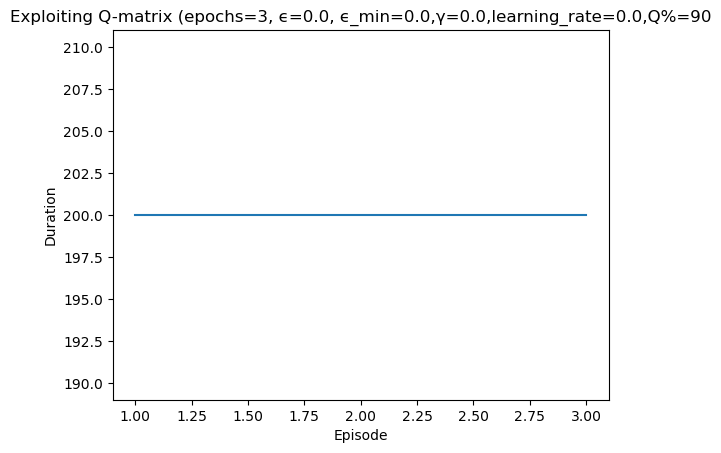

In [9]:
# Evaluate an agent that exploits the Q-table learnt above
tabularq_exploit_run = learner.epsilon_greedy_search(
    gym_env,
    ep,
    learner=tqa.QTabularLearner(ep, trained=tabularq_run["learner"], gamma=0.0, learning_rate=0.0, exploit_percentile=90),
    episode_count=eval_episode_count,
    iteration_count=iteration_count,
    epsilon=0.0,
    render=False,
    verbosity=Verbosity.Quiet,
    render_last_episode_rewards_to=os.path.join(plots_dir, f"tabularq-{gymid}"),
    title="Exploiting Q-matrix",
)

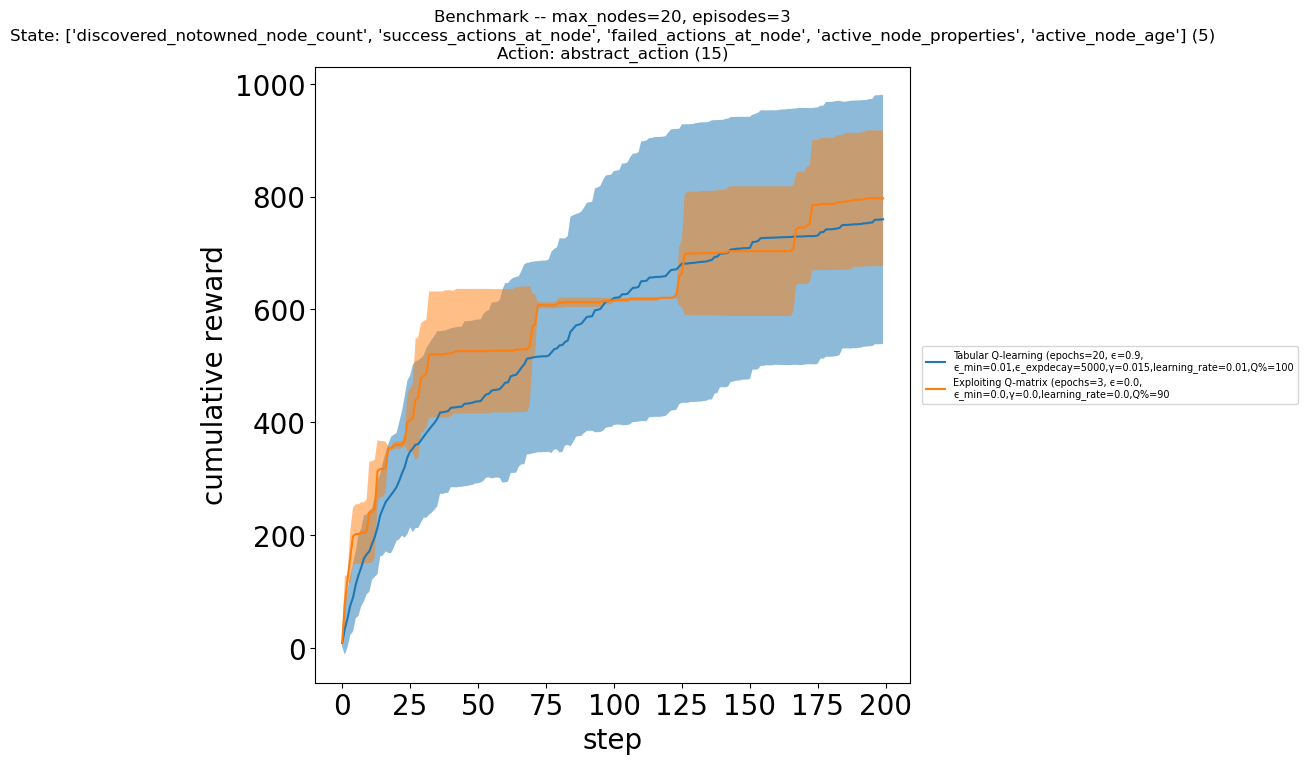

In [10]:
# Compare and plot results for all the agents
all_runs = [
    tabularq_run,
    tabularq_exploit_run,
]

# Plot averaged cumulative rewards for DQL vs Random vs DQL-Exploit
themodel = dqla.CyberBattleStateActionModel(ep)
p.plot_averaged_cummulative_rewards(
    all_runs=all_runs,
    title=(
        f"Benchmark -- max_nodes={ep.maximum_node_count}, episodes={eval_episode_count}\n"
        f"State: {[f.name() for f in themodel.state_space.feature_selection]} "
        f"({len(themodel.state_space.feature_selection)})\n"
        f"Action: abstract_action ({themodel.action_space.flat_size()})"
    ),
    save_at=os.path.join(plots_dir, f"benchmark-{gymid}-cumrewards.png"),
)

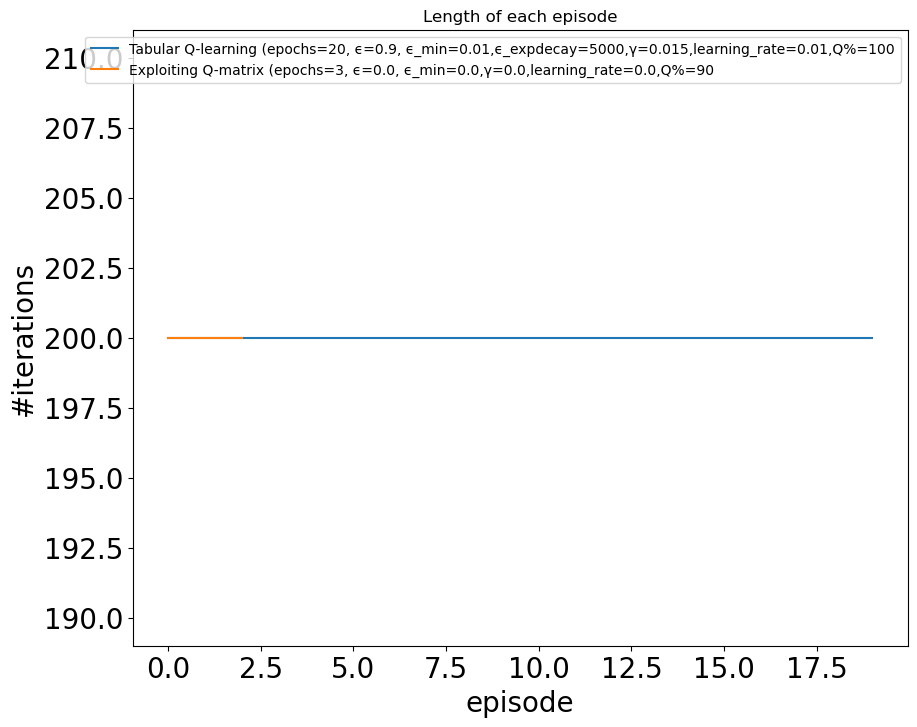

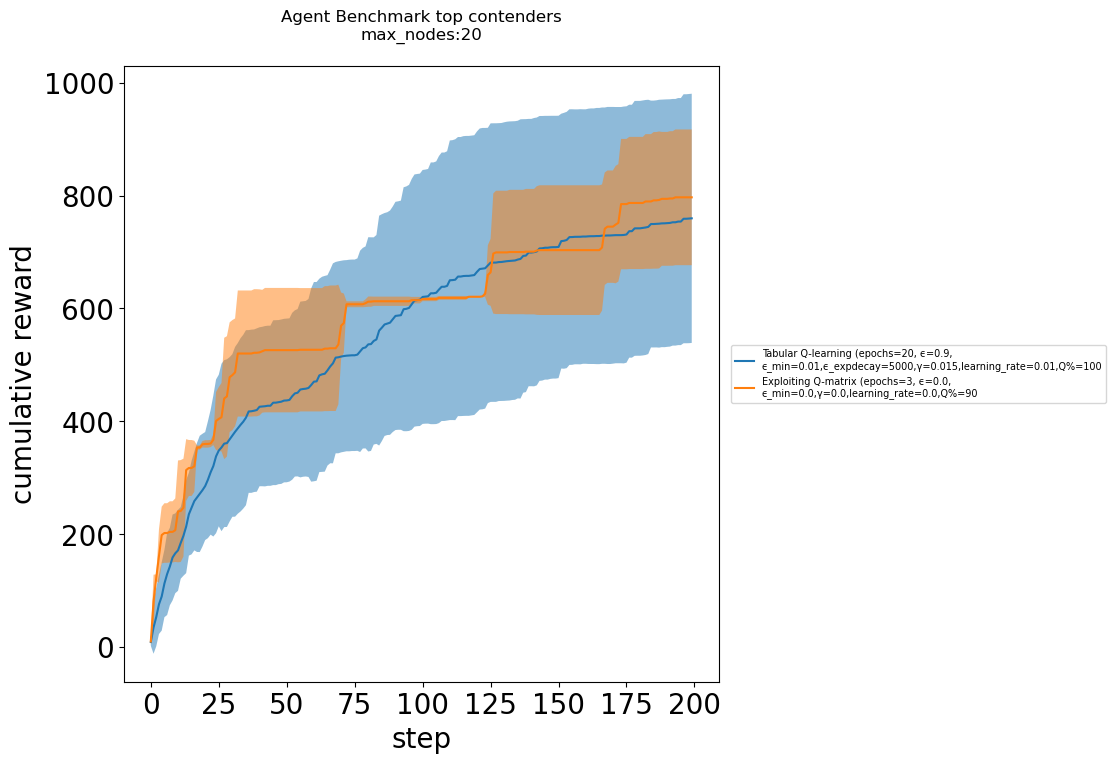

In [11]:
contenders = [tabularq_run, tabularq_exploit_run]
p.plot_episodes_length(contenders)
p.plot_averaged_cummulative_rewards(
    title=f"Agent Benchmark top contenders\nmax_nodes:{ep.maximum_node_count}\n",
    all_runs=contenders,
    save_at=os.path.join(plots_dir, f"benchmark-{gymid}-cumreward_contenders.png"),
)

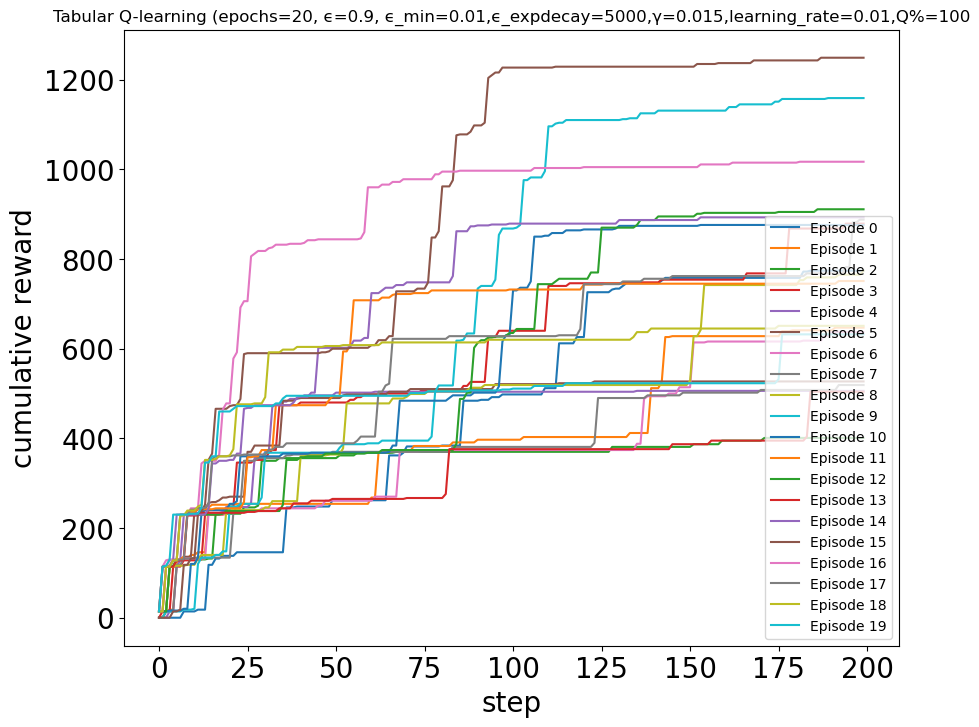

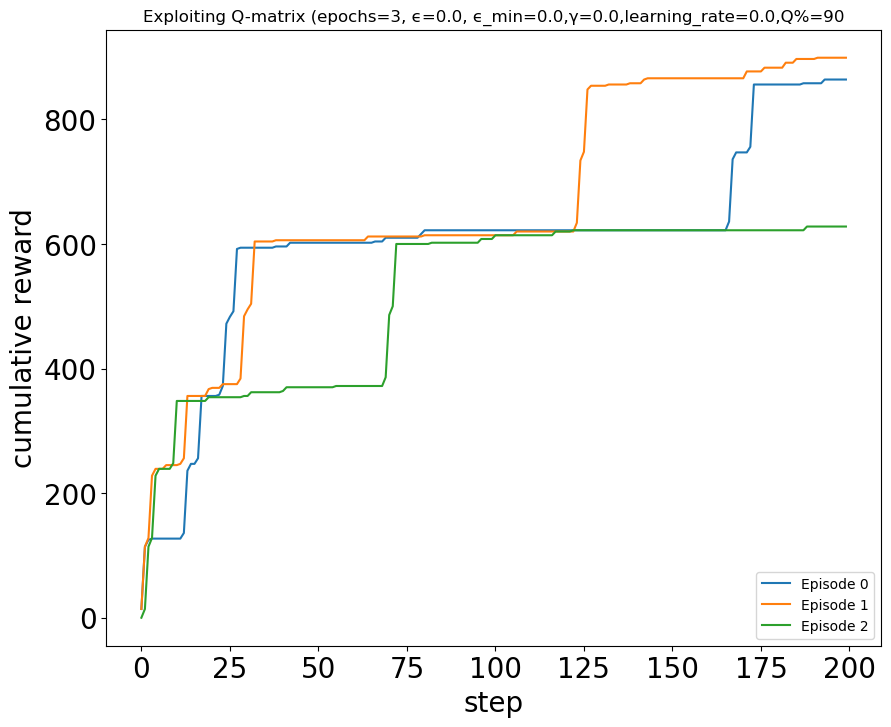

In [12]:
# Plot cumulative rewards for all episodes
for r in contenders:
    p.plot_all_episodes(r)